[I 2024-06-01 01:48:30,200] A new study created in memory with name: no-name-d7eabbe2-3aba-4e40-b972-13764054ea54
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:56: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 0.8),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Best parameters for DEXUSUK: {'max_depth': 3, 'learning_rate': 0.009990204145901264, 'n_estimators': 150, 'subsample': 0.6344673590694468, 'colsample_bytree': 0.6894703861128622, 'alpha': 0.04031149975723652, 'lambda': 0.020949493968792286}


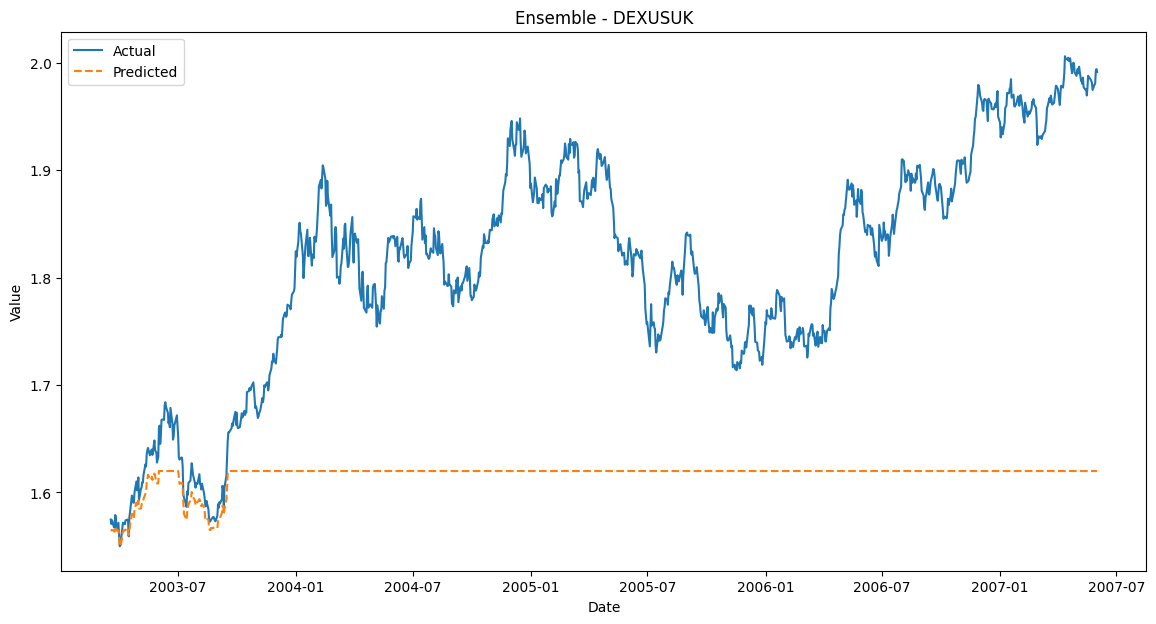

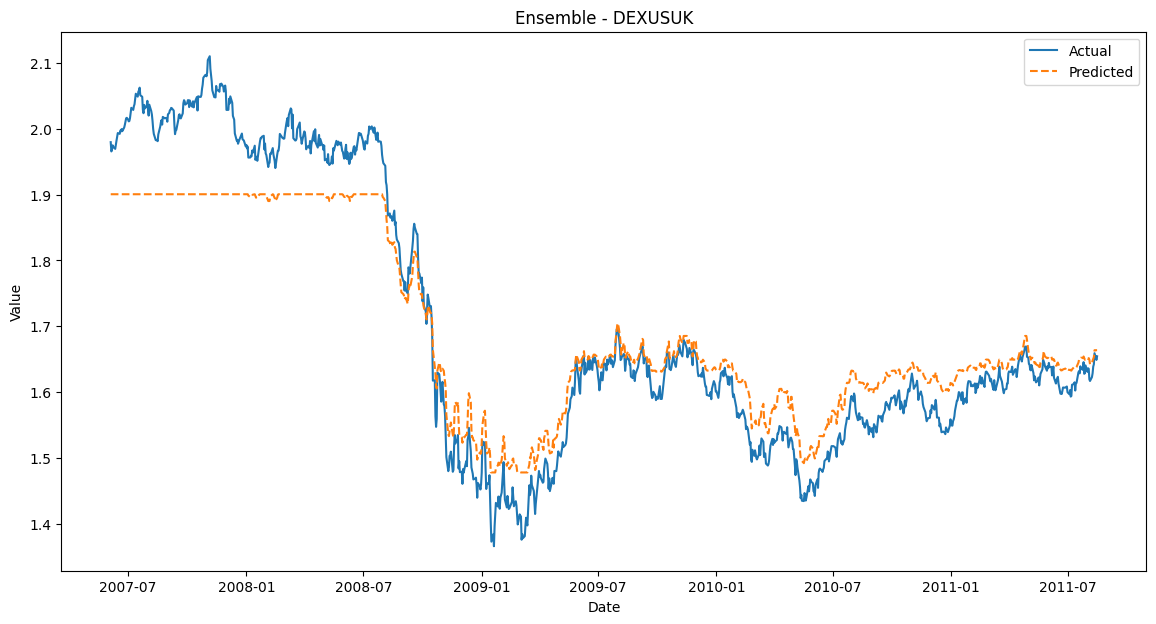

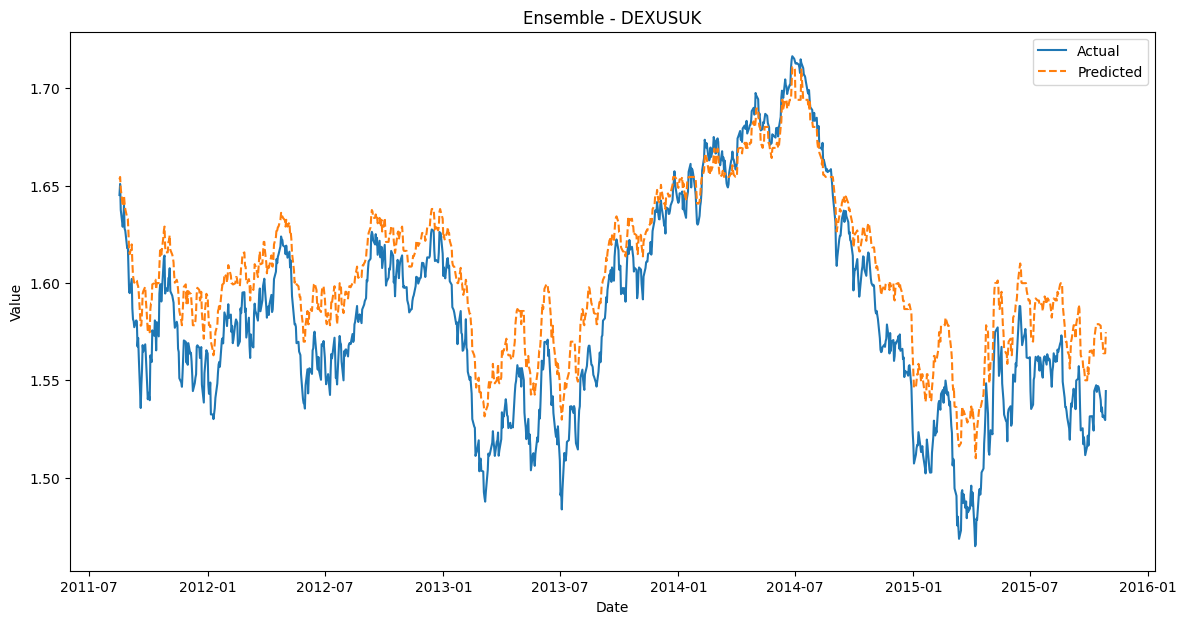

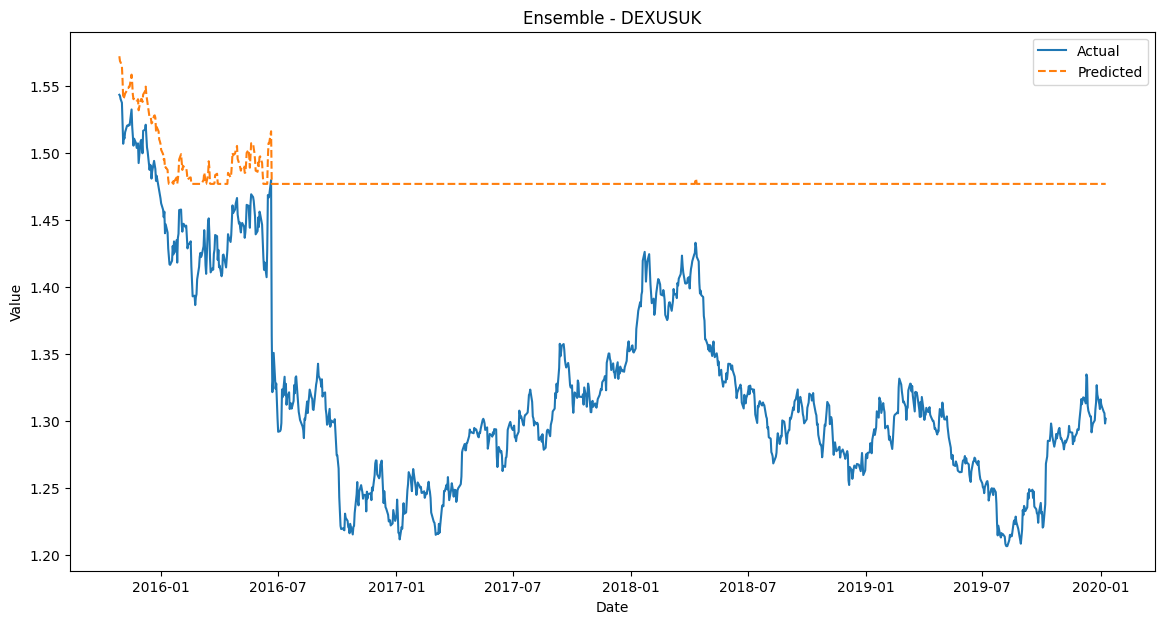

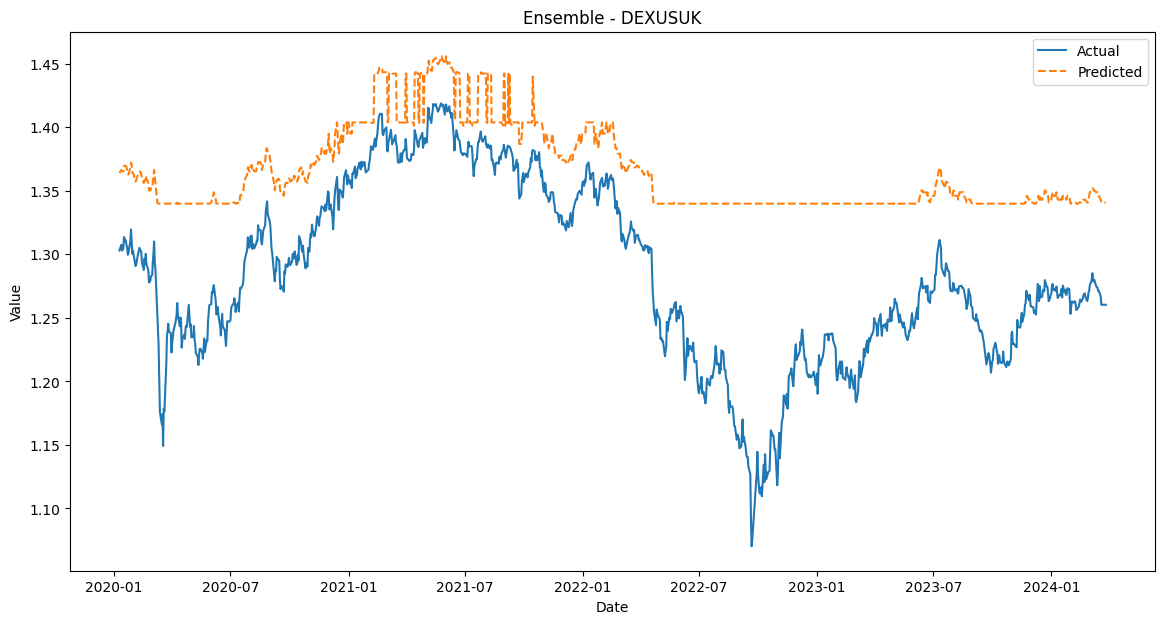

[I 2024-06-01 01:52:33,017] A new study created in memory with name: no-name-1edd813c-4d52-4840-99c2-70d0fcca8b22
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:56: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 0.8),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Best parameters for DEXUSEU: {'max_depth': 4, 'learning_rate': 0.005216456597879005, 'n_estimators': 144, 'subsample': 0.7110400320503165, 'colsample_bytree': 0.5346438594935357, 'alpha': 0.001387842249744126, 'lambda': 0.0084604074557624}


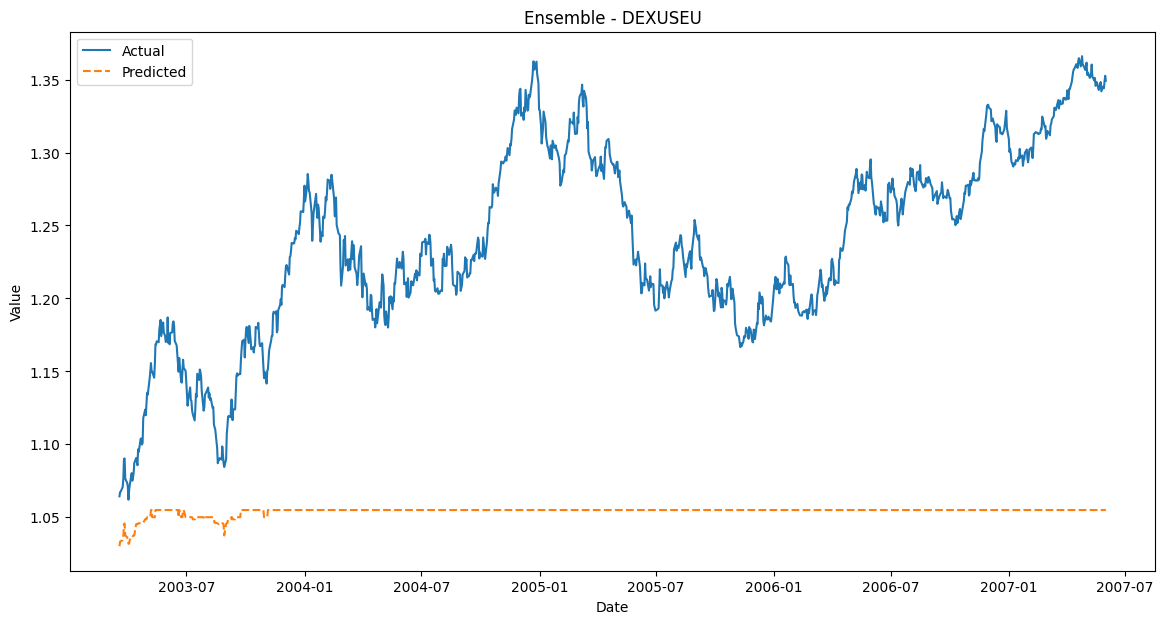

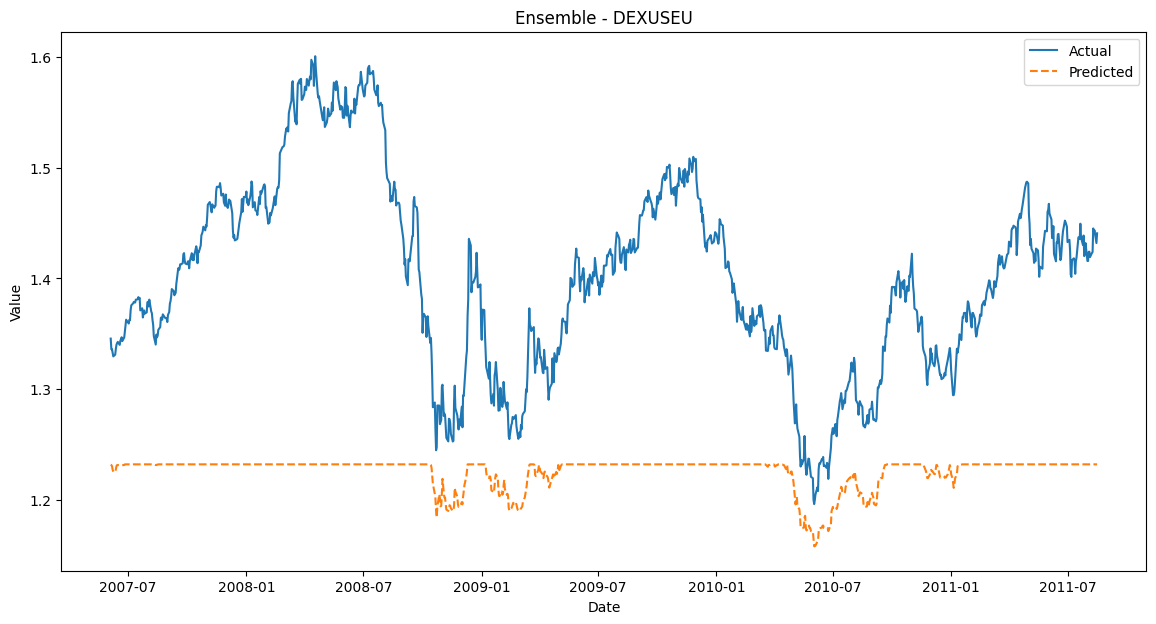

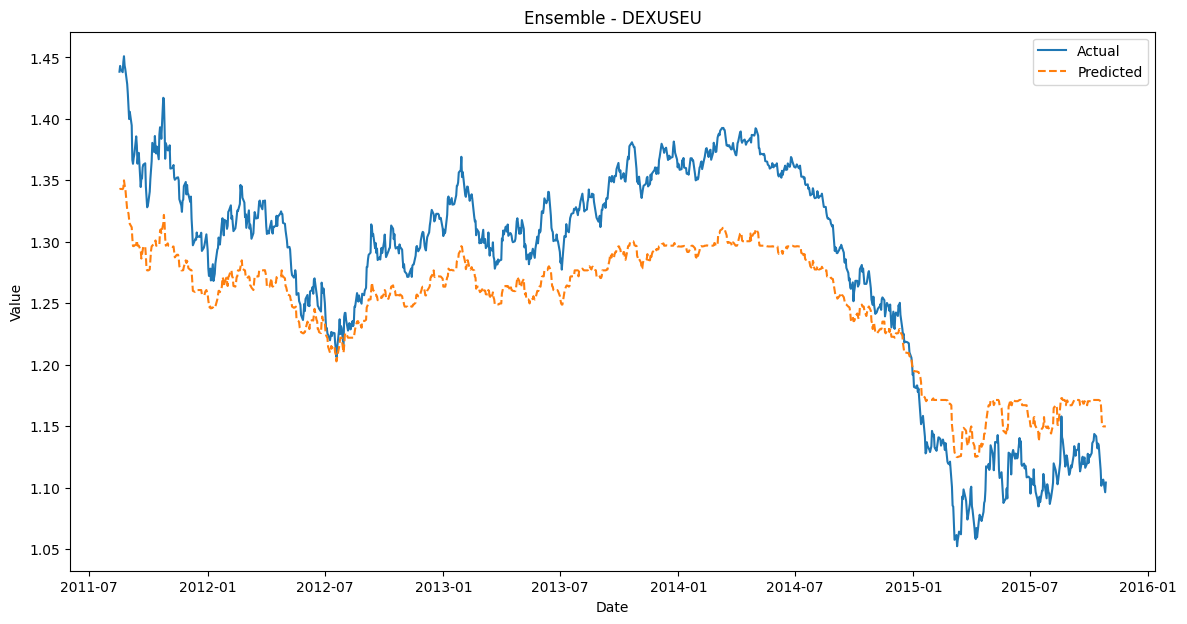

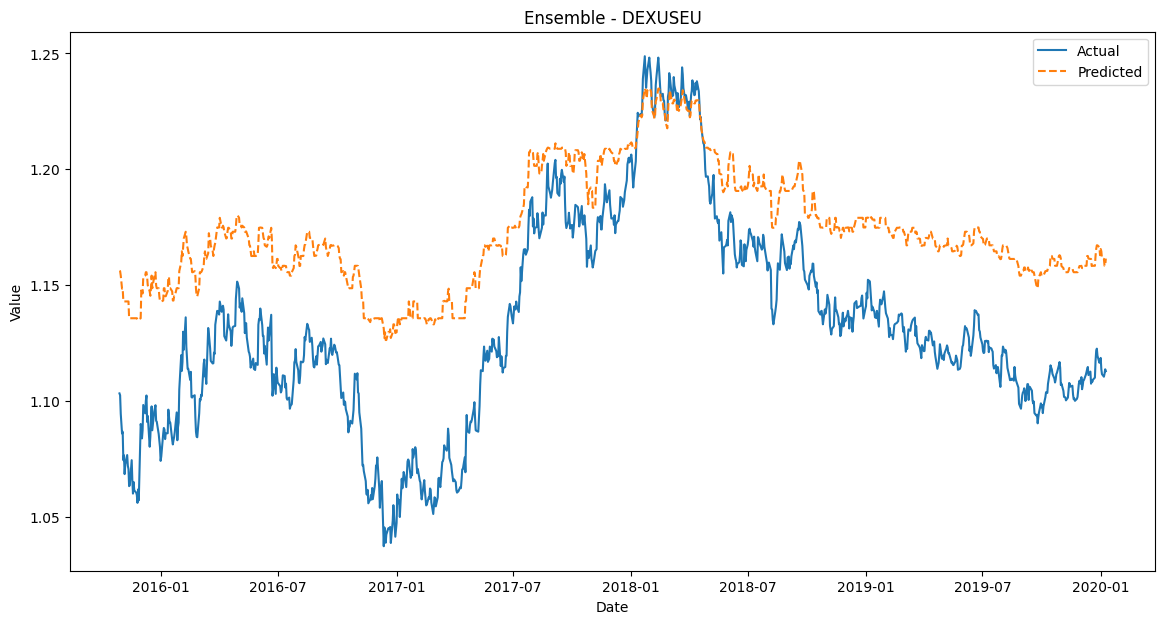

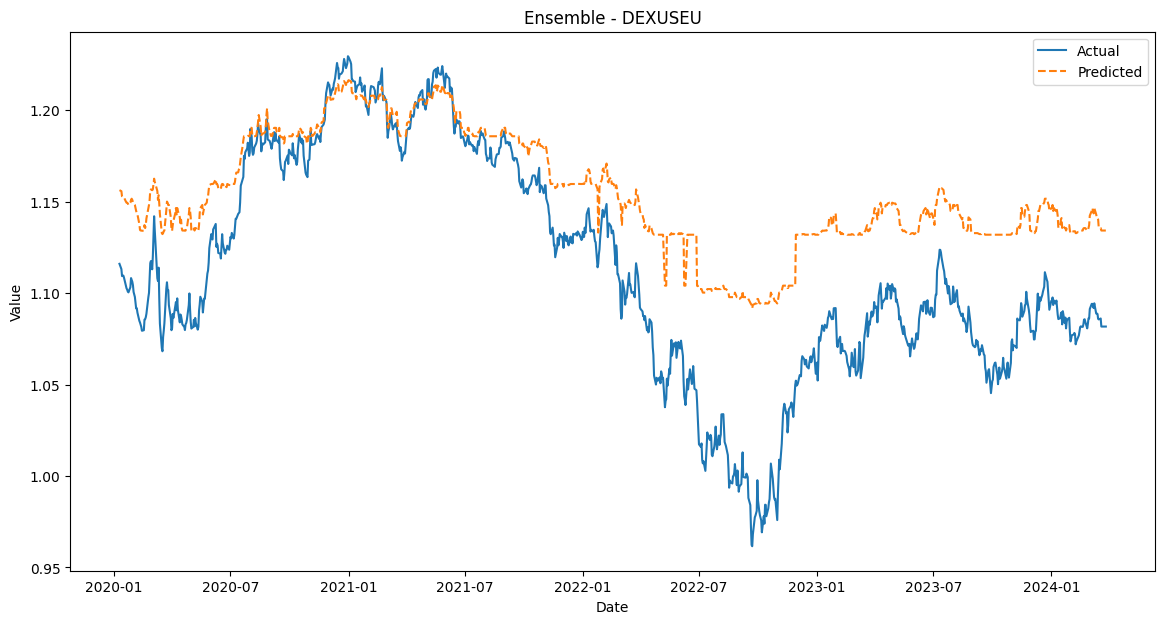

[I 2024-06-01 01:56:34,953] A new study created in memory with name: no-name-dbd44540-184d-49ea-8e88-fa74ade876b7
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:56: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 0.8),
C:\Users\aghab\AppData\Local\Temp\ipykernel_18980\3335754971.py:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Best parameters for DEXUSJP: {'max_depth': 3, 'learning_rate': 0.009888866344816869, 'n_estimators': 145, 'subsample': 0.6863476187533413, 'colsample_bytree': 0.7133686615817731, 'alpha': 0.03428052729799958, 'lambda': 0.03541725036479097}


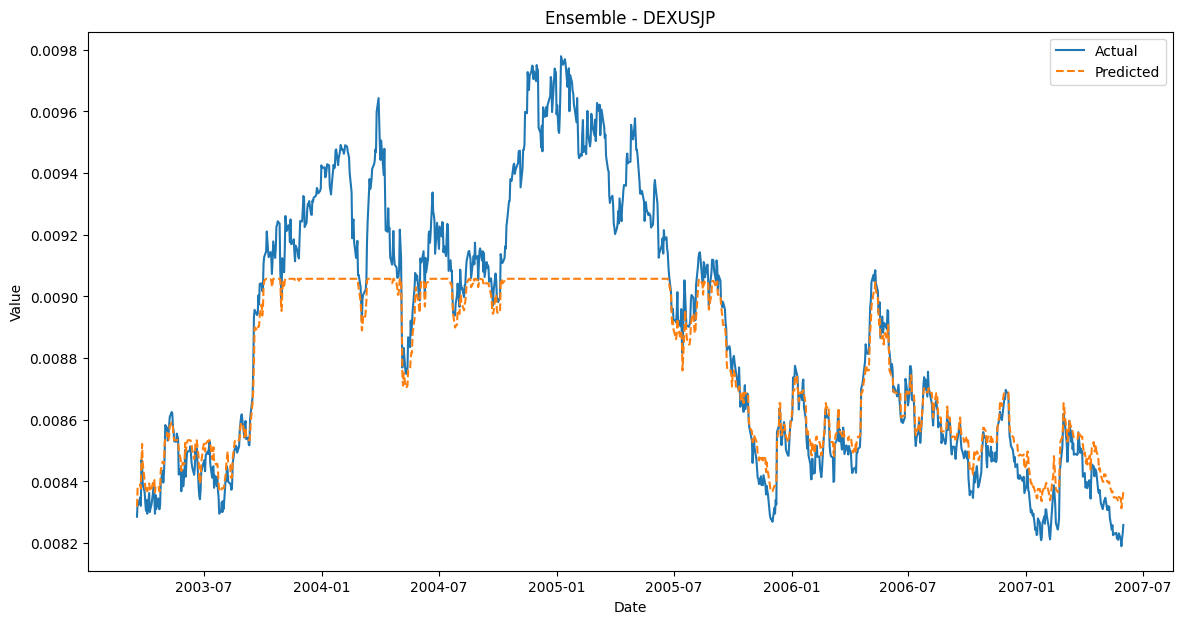

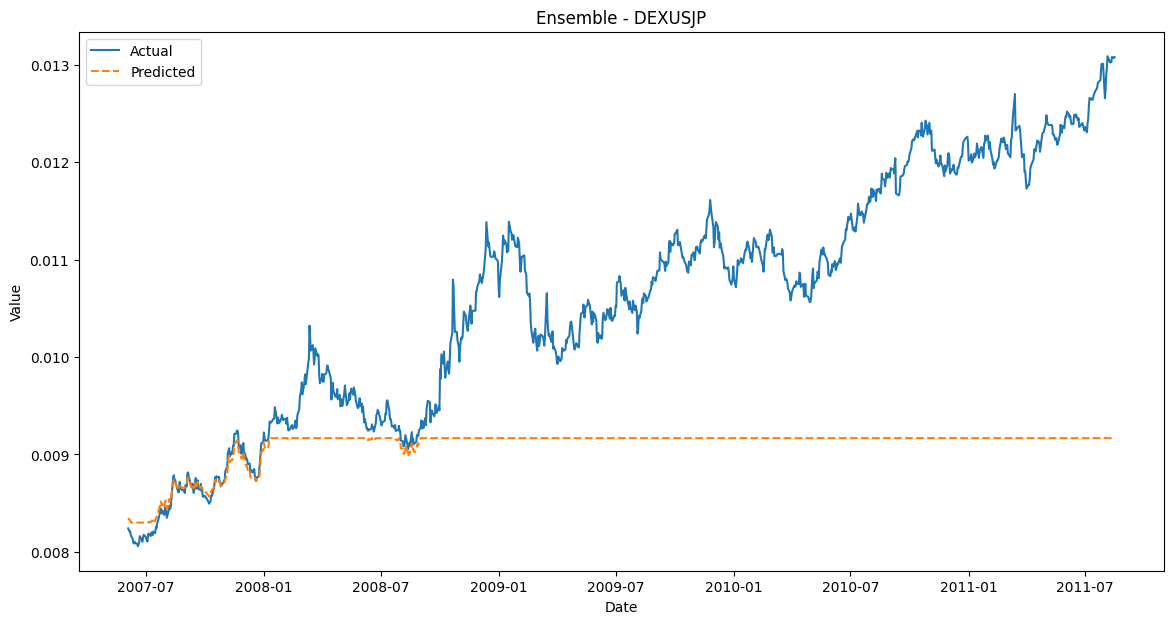

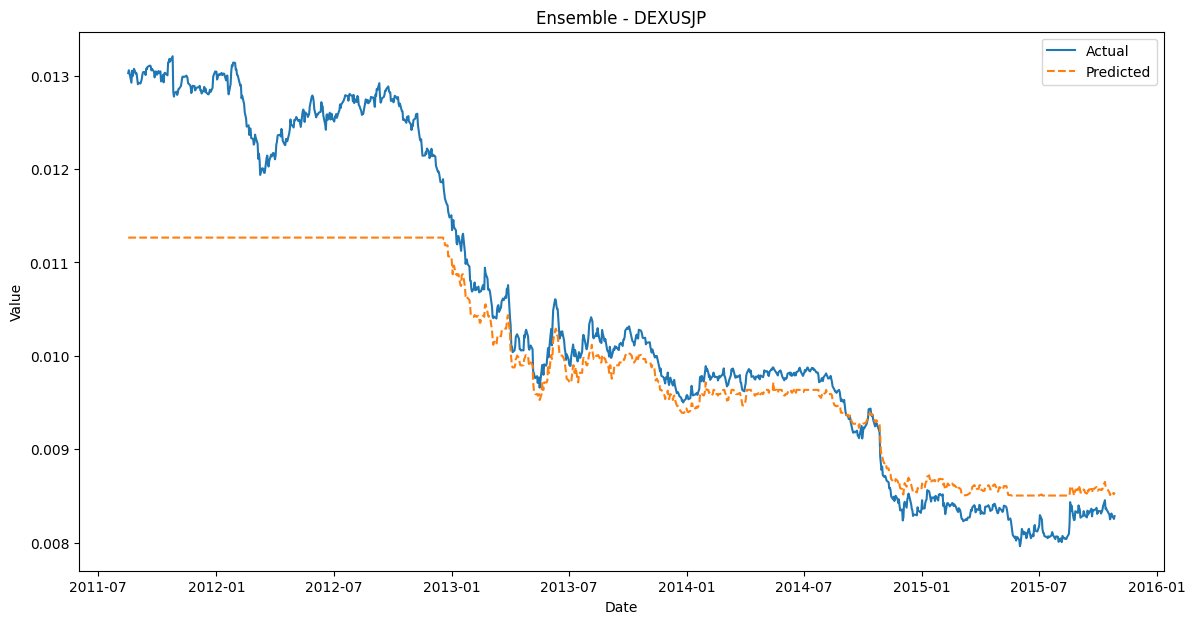

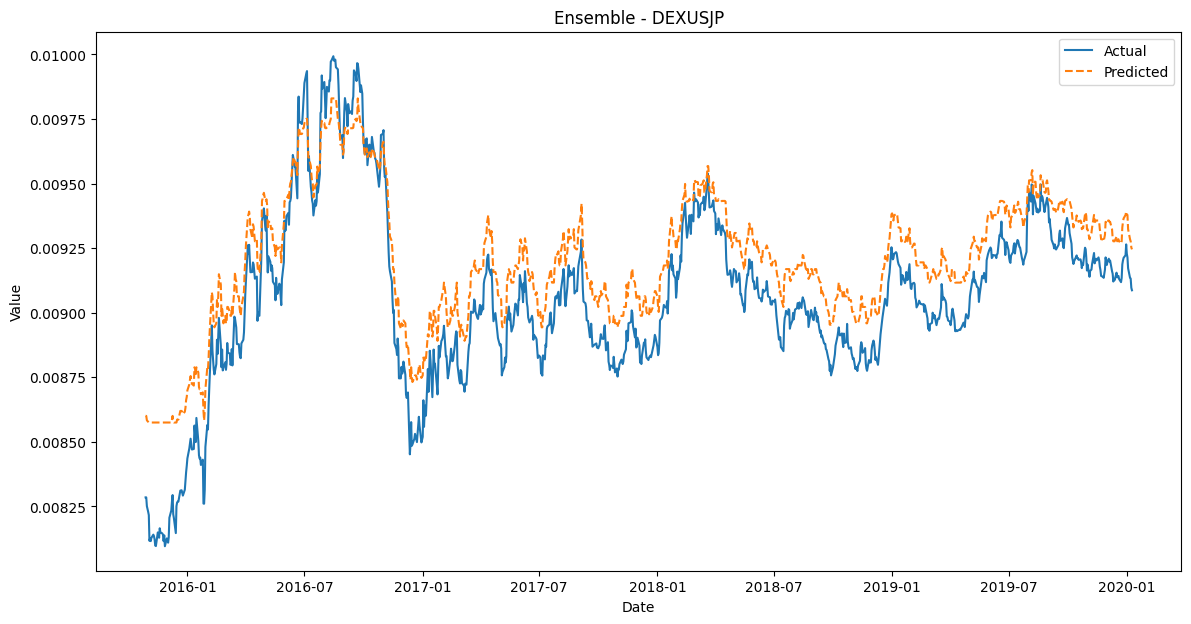

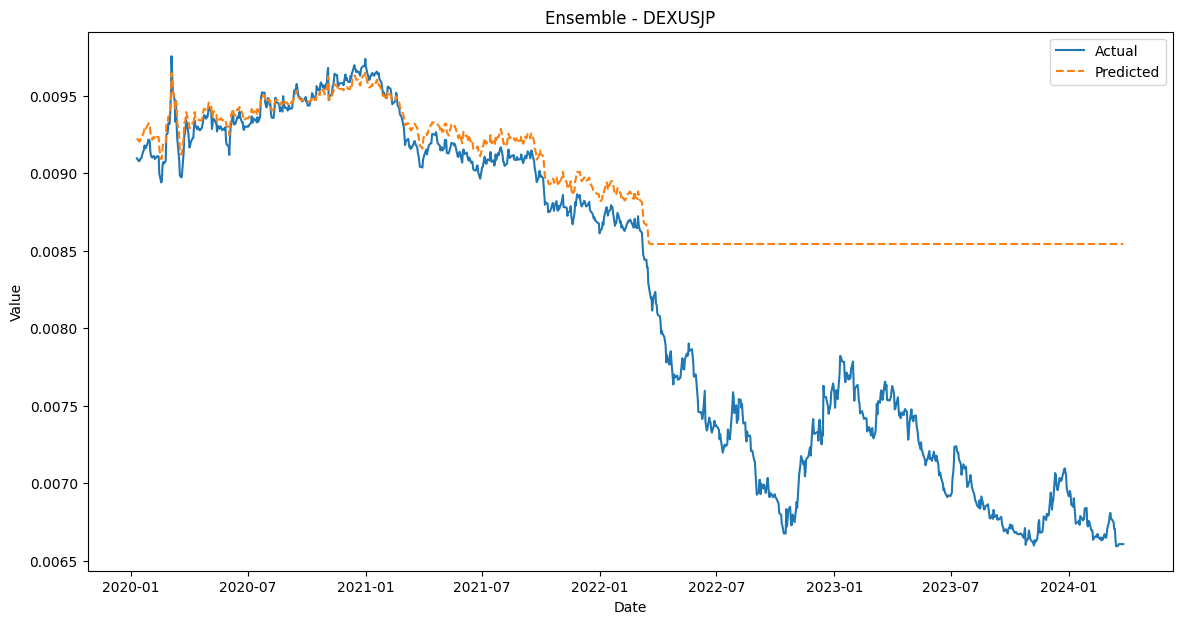

                                           Best Parameters Train R^2  \
                                                     first      mean   
Target                                                                 
DEXUSEU  {'max_depth': 4, 'learning_rate': 0.0052164565...  0.773789   
DEXUSJP  {'max_depth': 3, 'learning_rate': 0.0098888663...  0.859299   
DEXUSUK  {'max_depth': 3, 'learning_rate': 0.0099902041...  0.945236   

                   Test R^2               Train MSE                Test MSE  \
              std      mean       std          mean           std      mean   
Target                                                                        
DEXUSEU  0.041965 -2.179331  3.731120  5.975164e-03  2.904030e-03  0.016377   
DEXUSJP  0.068151  0.219238  0.879148  1.249880e-07  5.209075e-08  0.000001   
DEXUSUK  0.002116 -1.377259  2.435584  1.535932e-03  7.428265e-04  0.018191   

                  Train MAE            Test MAE            
              std      mean     

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
import optuna
import numpy as np

# Load the dataset
file_path = 'combined_1.csv'  # Adjust this path to your file location
data = pd.read_csv(file_path)

# Convert date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the date column as the index
data.set_index('DATE', inplace=True)

# List of target columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

# Function to create time series features with lags and rolling means
def create_time_series_features(df, target_column, lags=3, window=3):
    X = df.drop(columns=target_columns)
    for lag in range(1, lags + 1):
        X[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    for window_size in range(2, window + 1):
        X[f'{target_column}_rolling_mean_{window_size}'] = df[target_column].rolling(window=window_size).mean()
    y = df[target_column].shift(-lags)
    return X.dropna(), y.dropna()

# Function to plot predictions
def plot_predictions(dates, actual, predicted, target_column):
    plt.figure(figsize=(14, 7))
    plt.plot(dates, actual, label='Actual')
    plt.plot(dates, predicted, label='Predicted', linestyle='dashed')
    plt.title(f'Ensemble - {target_column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to optimize XGBoost parameters using Optuna
def optimize_xgb(trial, X, y):
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth', 2, 4),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'subsample': trial.suggest_uniform('subsample', 0.5, 0.8),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 0.8),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 1),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 1)
    }
    model = xgb.XGBRegressor(**param)
    
    tscv = TimeSeriesSplit(n_splits=5)
    mse_scores = []
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
        y_pred_test = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred_test))
    
    return np.mean(mse_scores)

# Initialize a list to store results
results_list = []

# Iterate through each target column and perform stacking ensemble regression
for target_column in target_columns:
    # Prepare features and labels
    X, y = create_time_series_features(data, target_column, lags=3, window=3)
    
    # Optimize XGBoost parameters using Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: optimize_xgb(trial, X.values, y.values), n_trials=50)
    
    best_params_xgb = study.best_params
    print(f'Best parameters for {target_column}: {best_params_xgb}')
    
    # Define the base models
    xgb_model = xgb.XGBRegressor(**best_params_xgb)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ridge_model = Ridge(alpha=1.0)
    
    # Create the stacking ensemble
    estimators = [
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('ridge', make_pipeline(StandardScaler(), ridge_model))
    ]
    ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb_model)
    
    # Split the data into training and testing sets using TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the ensemble model
        ensemble.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = ensemble.predict(X_train)
        y_pred_test = ensemble.predict(X_test)
        
        # Calculate performance metrics
        train_r2 = ensemble.score(X_train, y_train)
        test_r2 = ensemble.score(X_test, y_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Append the results to the list
        results_list.append({
            'Target': target_column,
            'Best Parameters': best_params_xgb,
            'Train R^2': train_r2,
            'Test R^2': test_r2,
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train MAE': train_mae,
            'Test MAE': test_mae
        })
        
        # Plot the results
        plot_predictions(y_test.index, y_test, y_pred_test, target_column)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Calculate average and standard deviation of the performance metrics for each target column
summary_df = results_df.groupby('Target').agg({
    'Best Parameters': 'first',
    'Train R^2': ['mean', 'std'],
    'Test R^2': ['mean', 'std'],
    'Train MSE': ['mean', 'std'],
    'Test MSE': ['mean', 'std'],
    'Train MAE': ['mean', 'std'],
    'Test MAE': ['mean', 'std']
})

# Display the summary results table
print(summary_df)


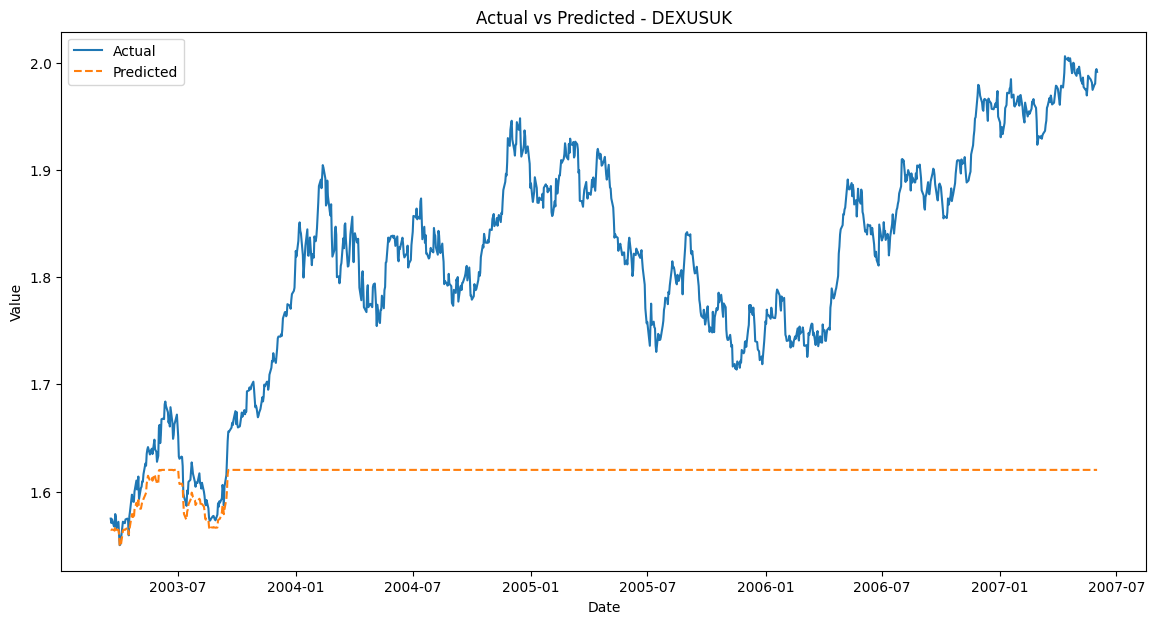

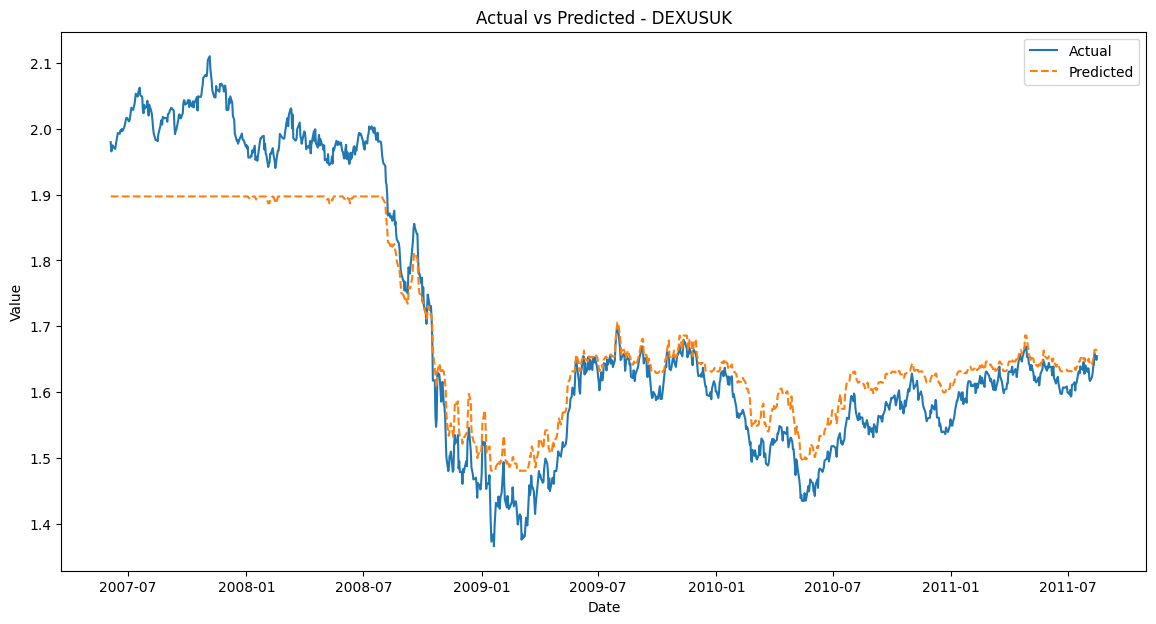

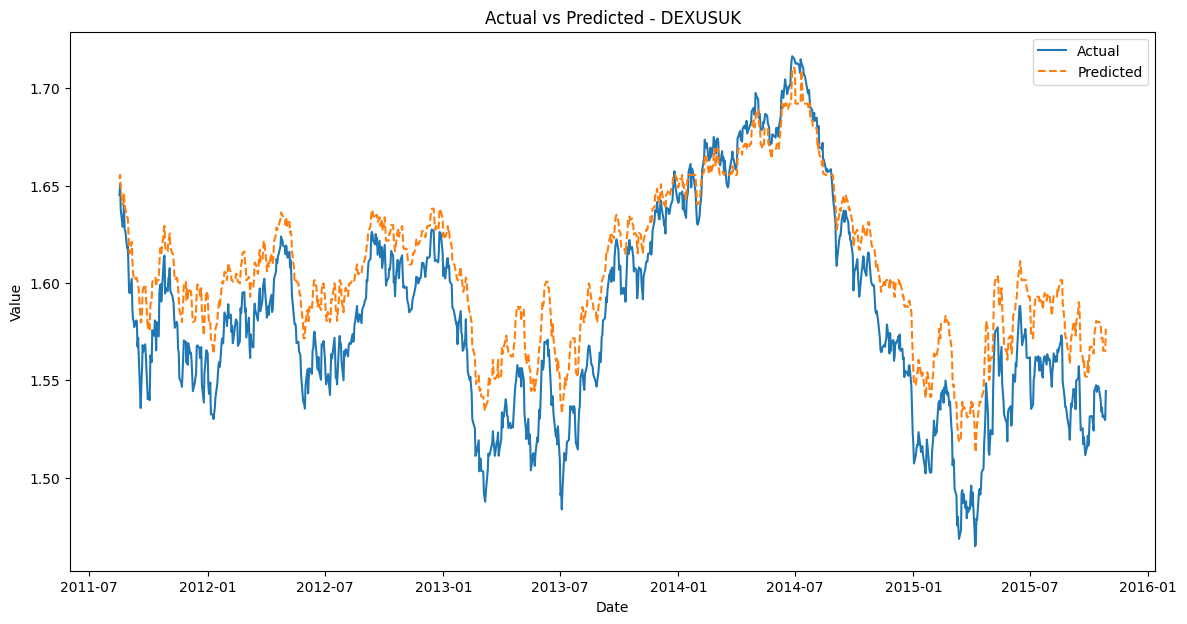

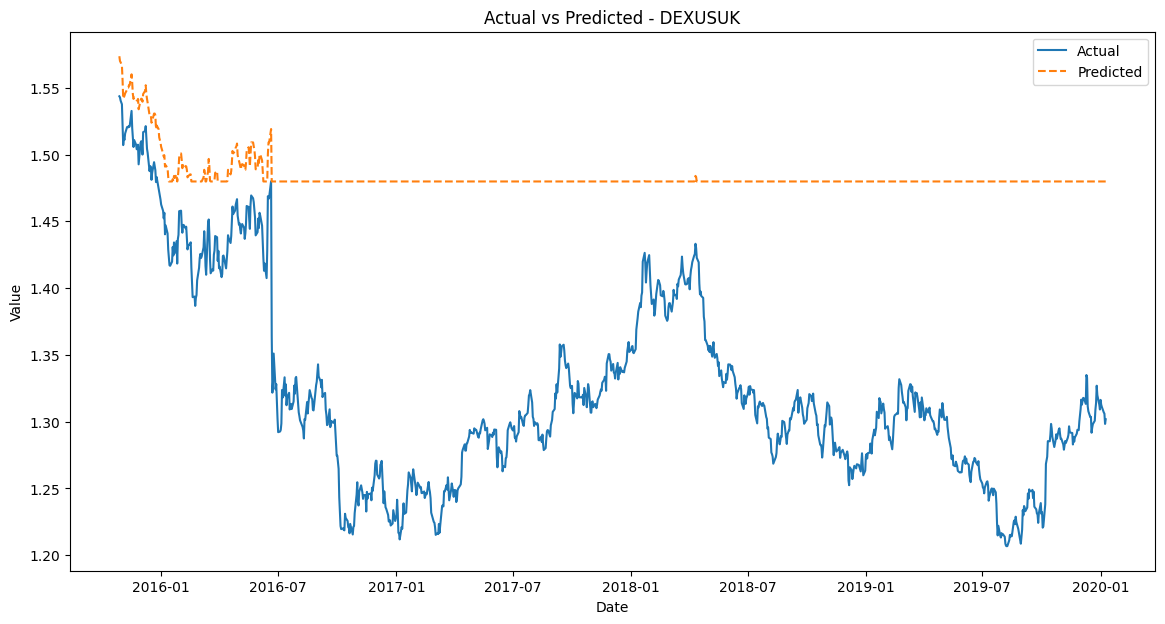

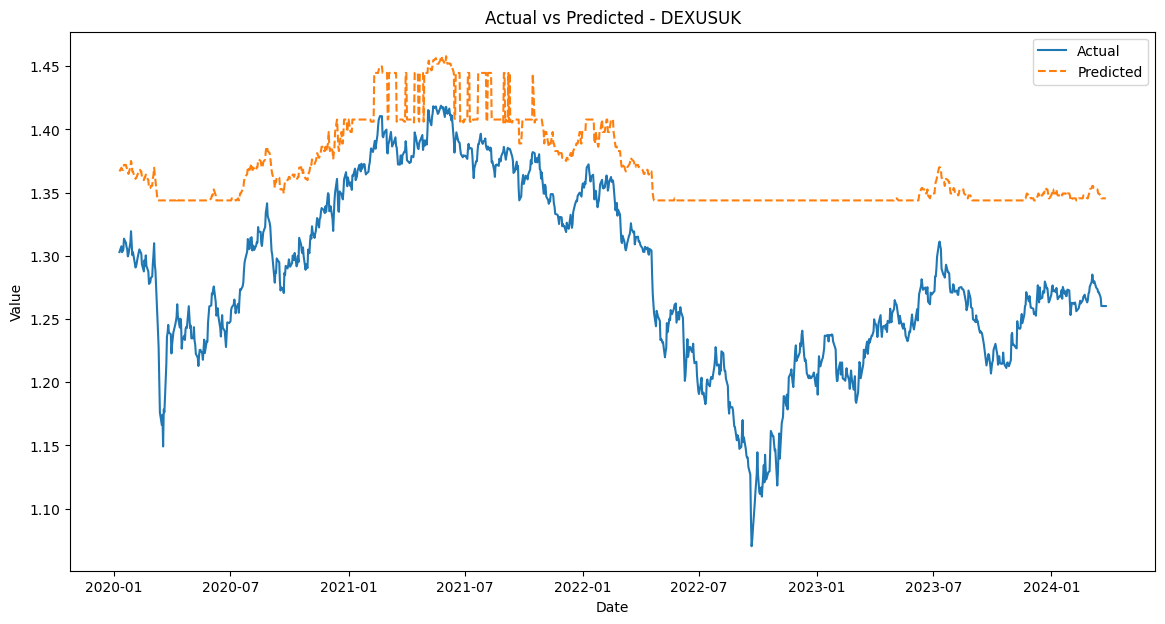

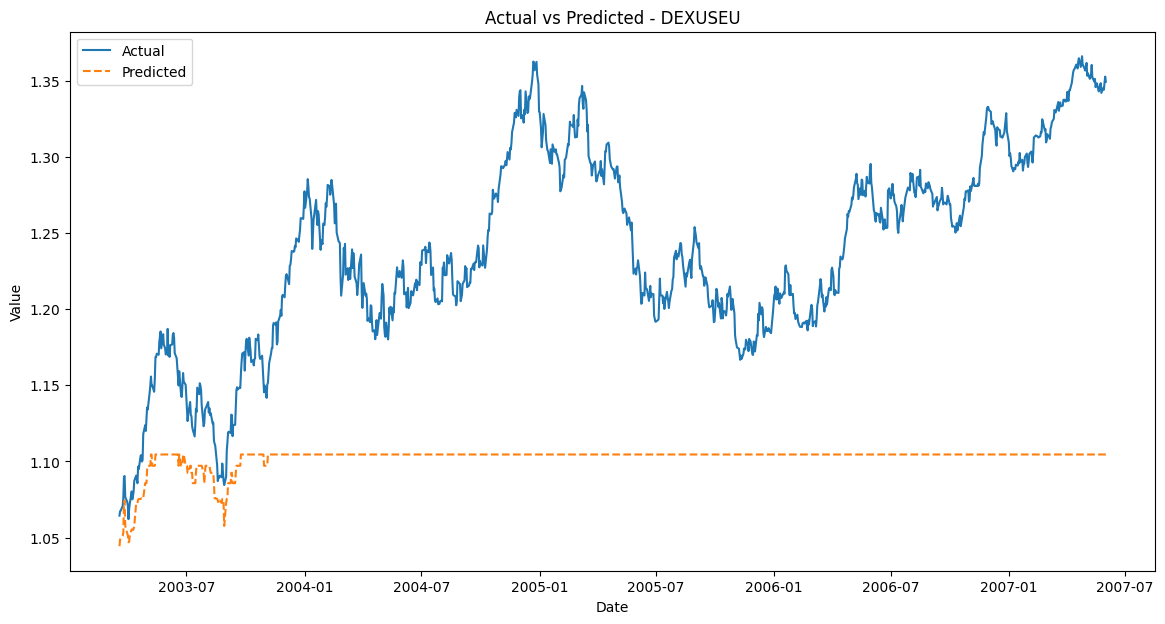

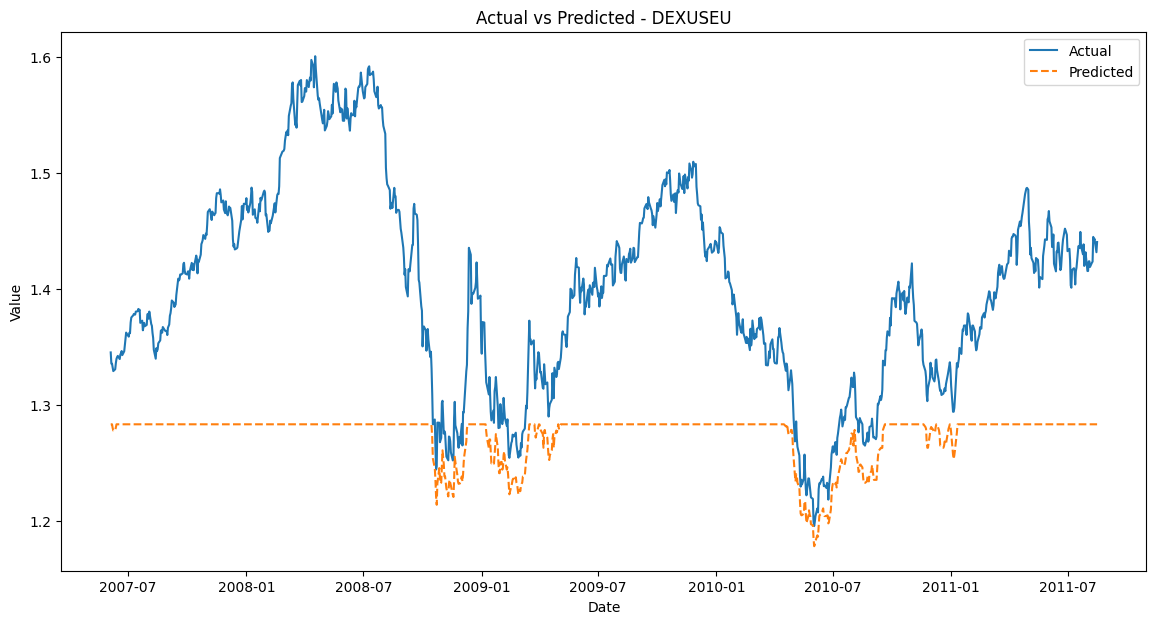

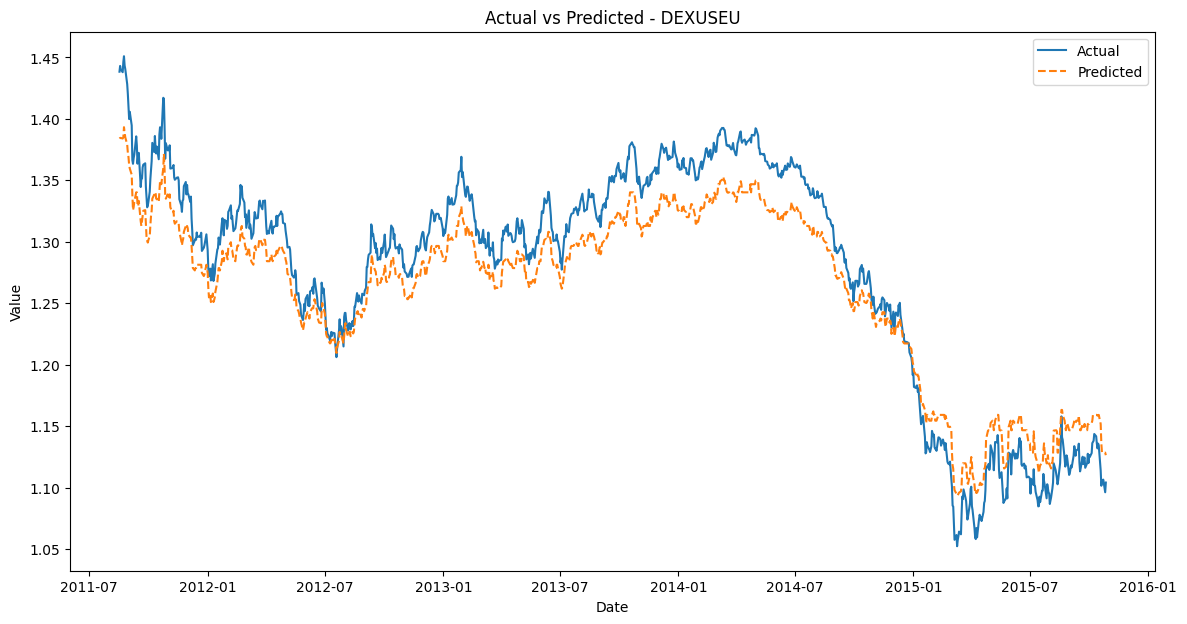

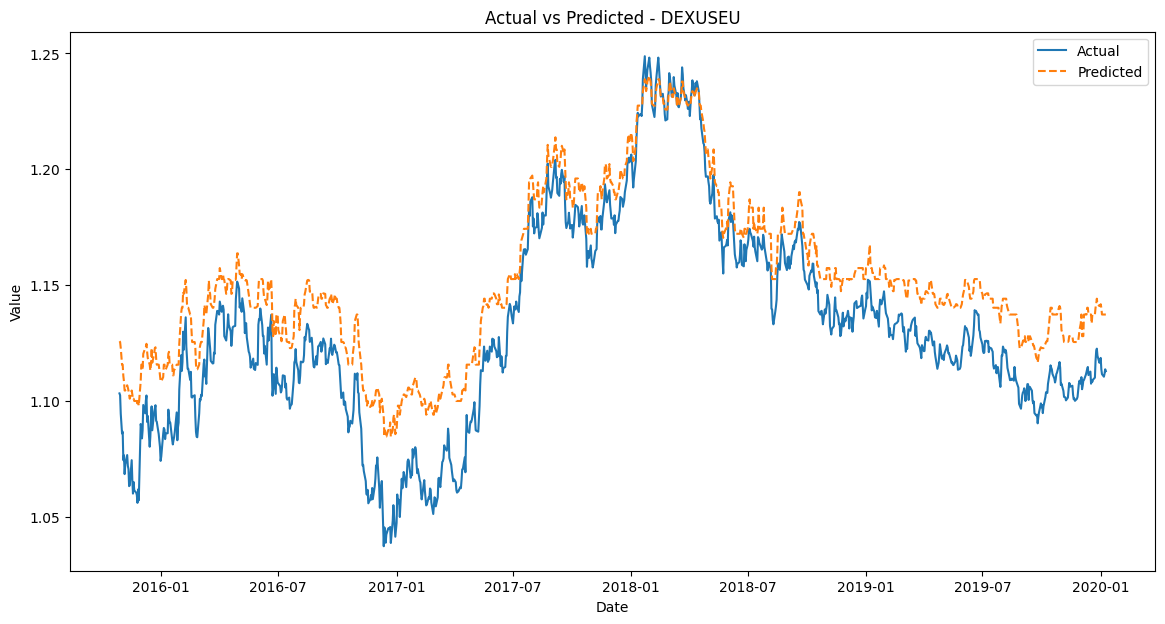

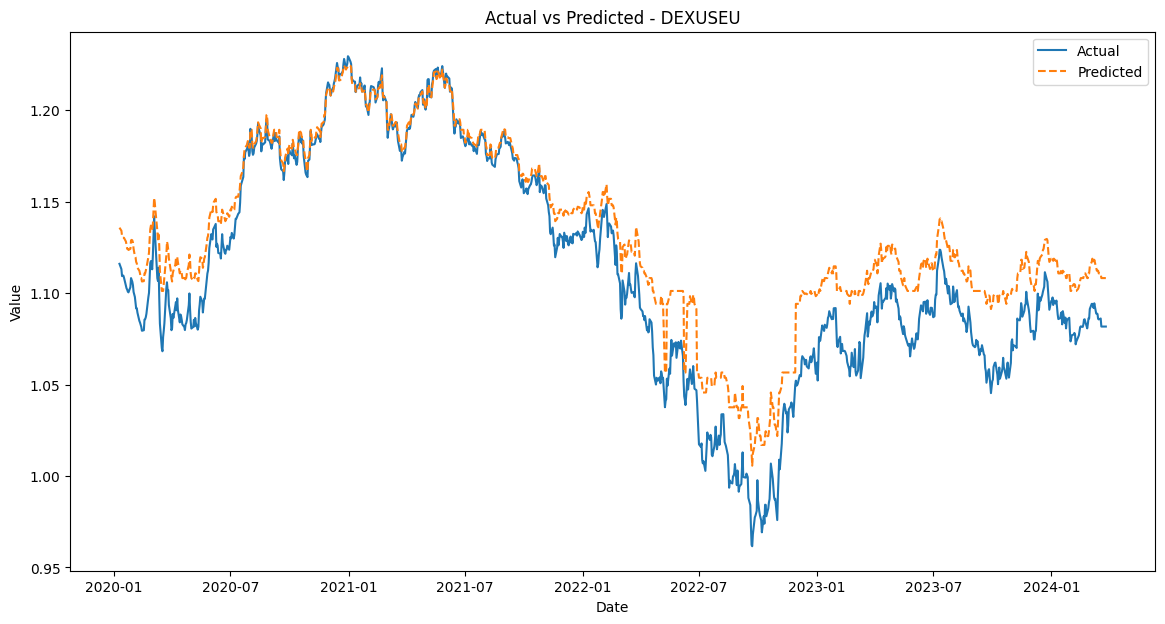

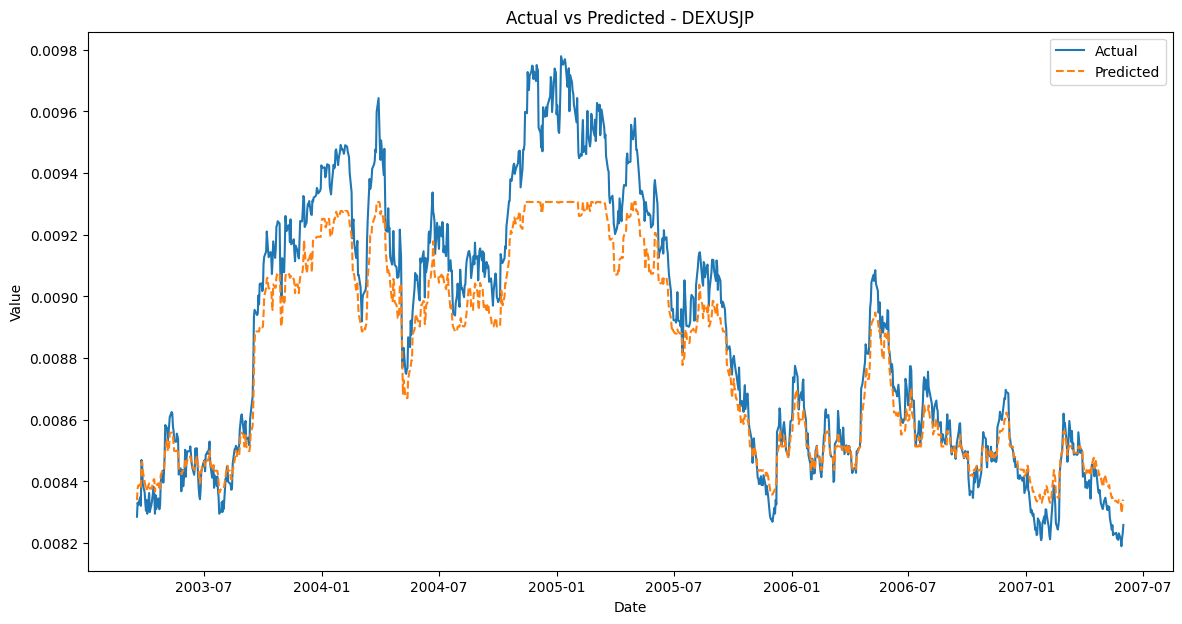

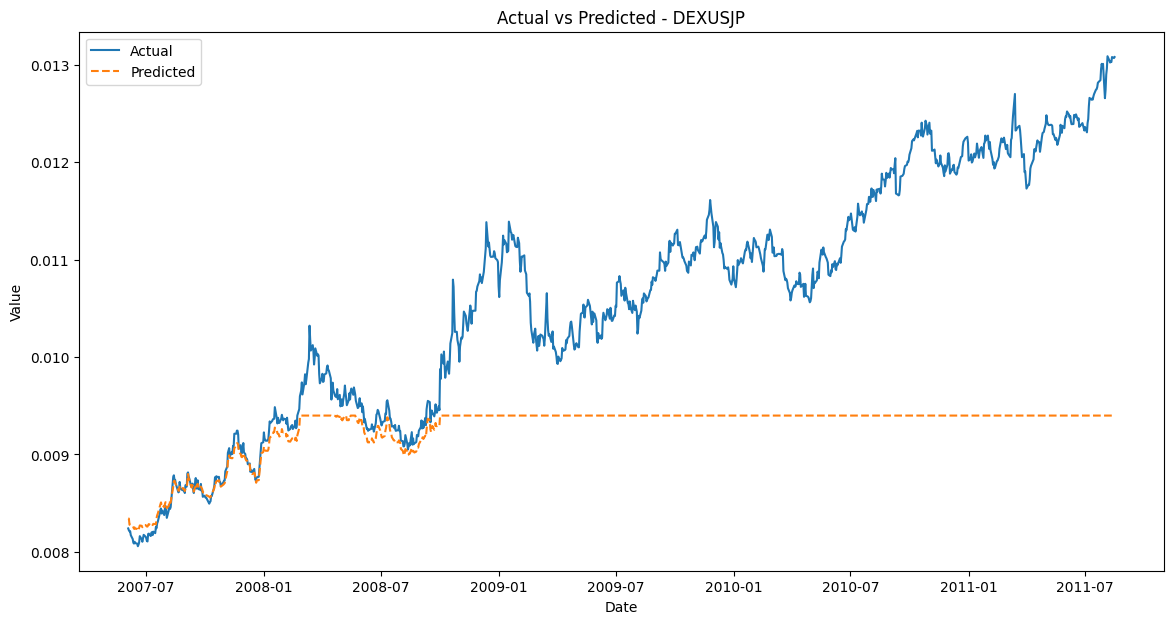

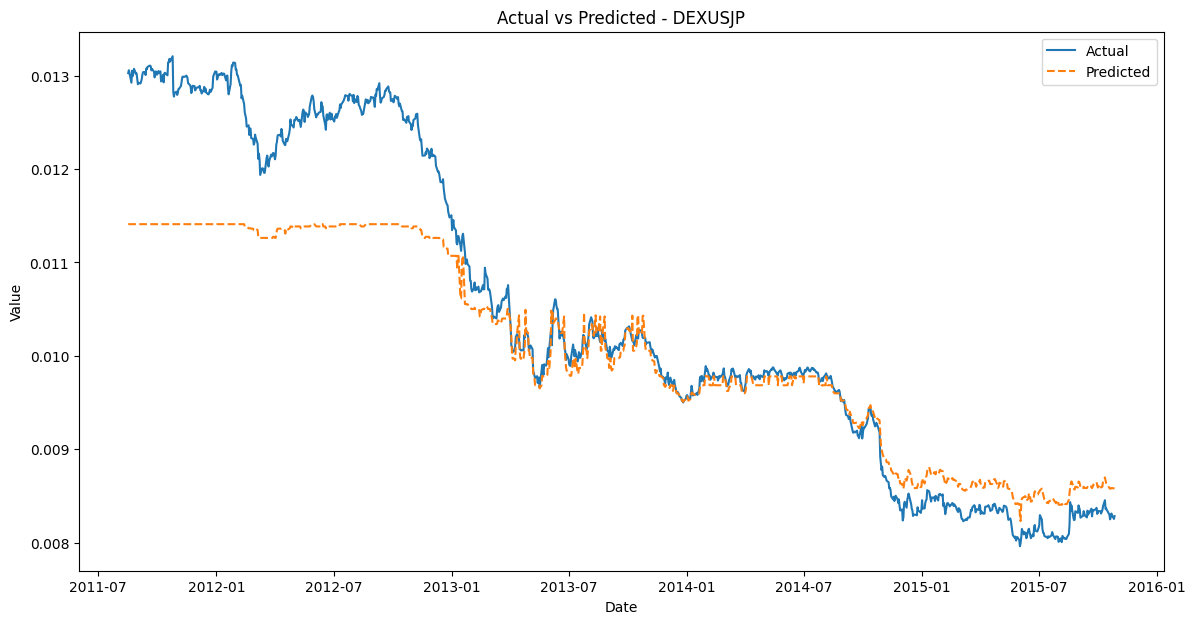

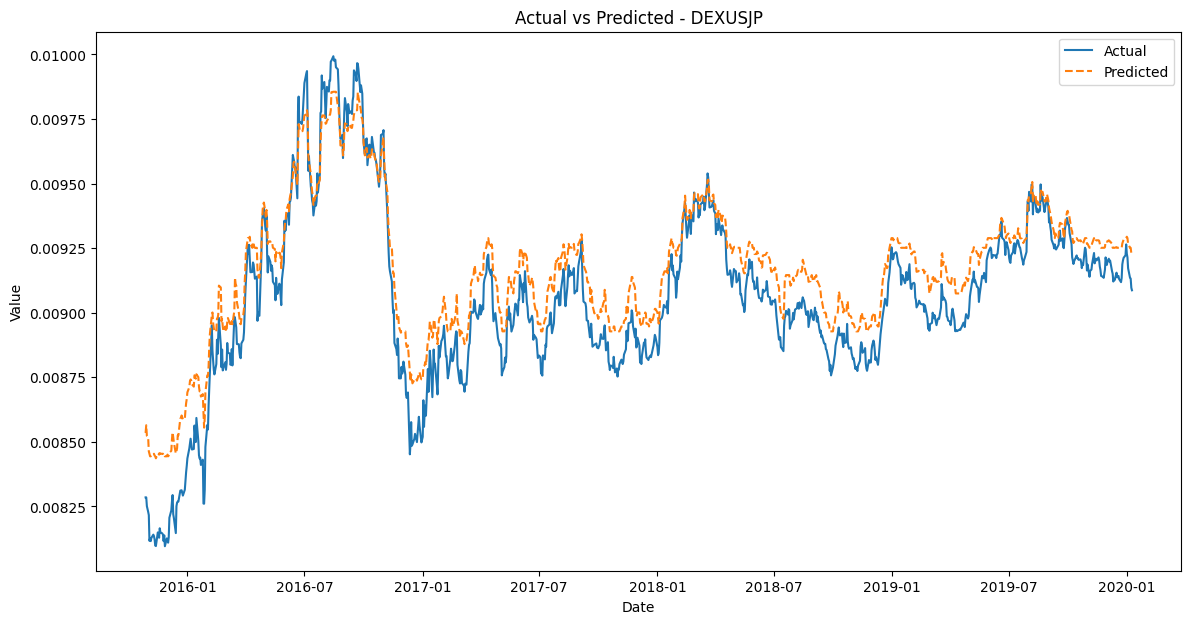

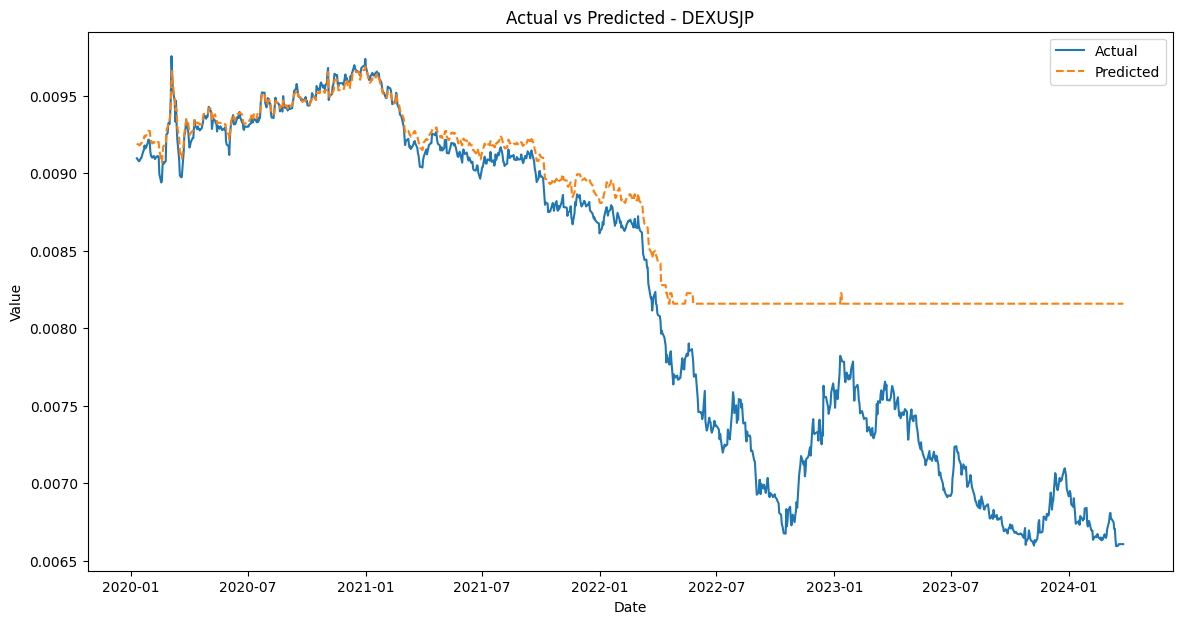

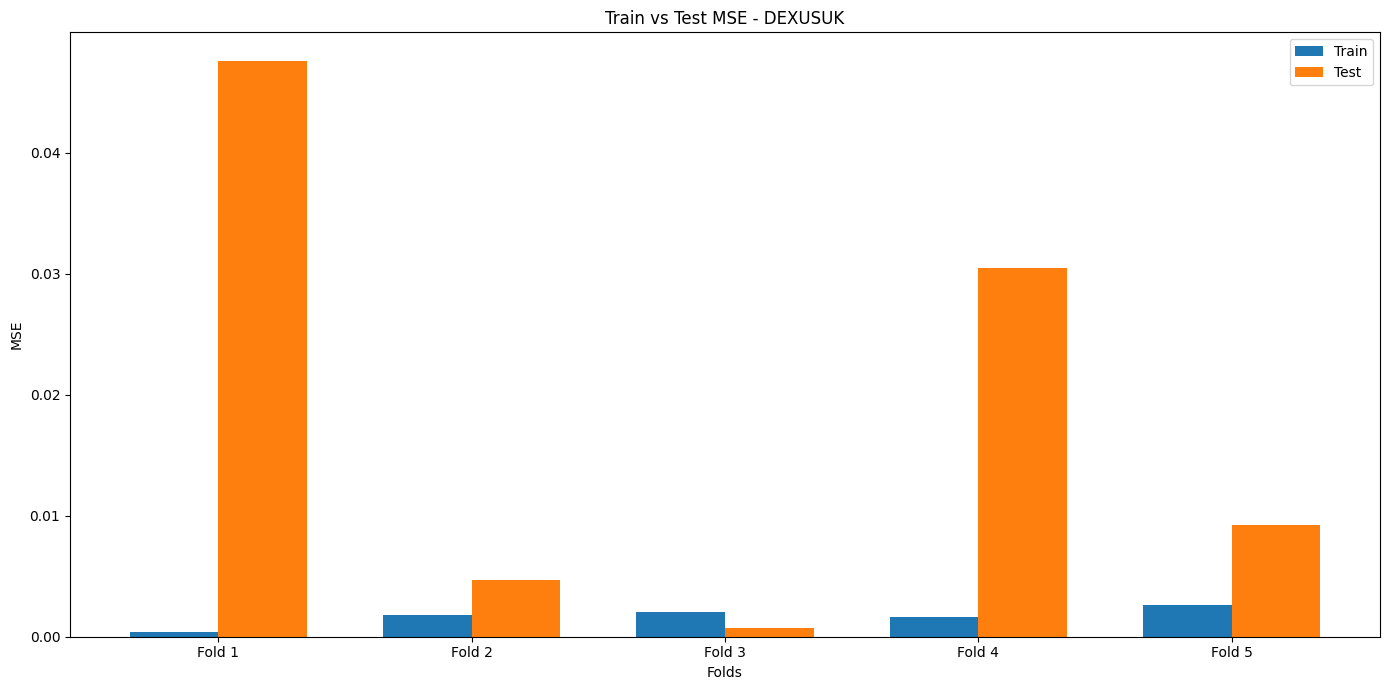

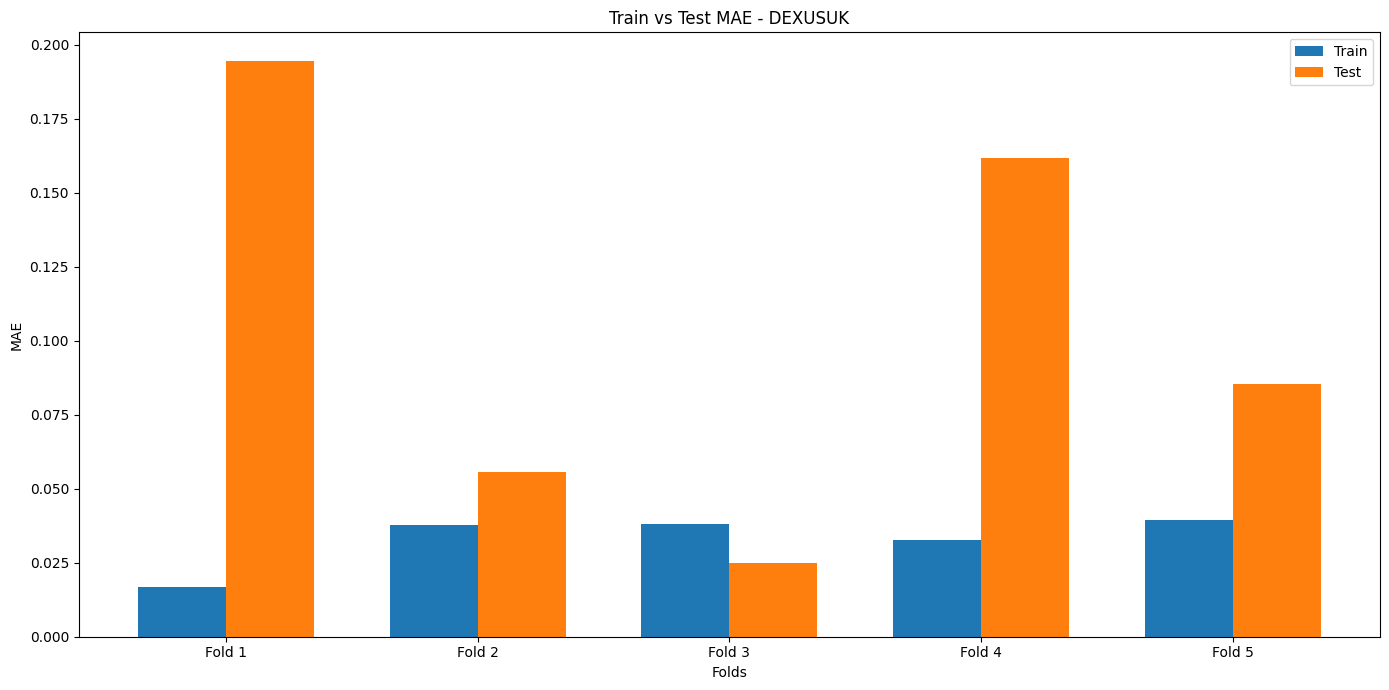

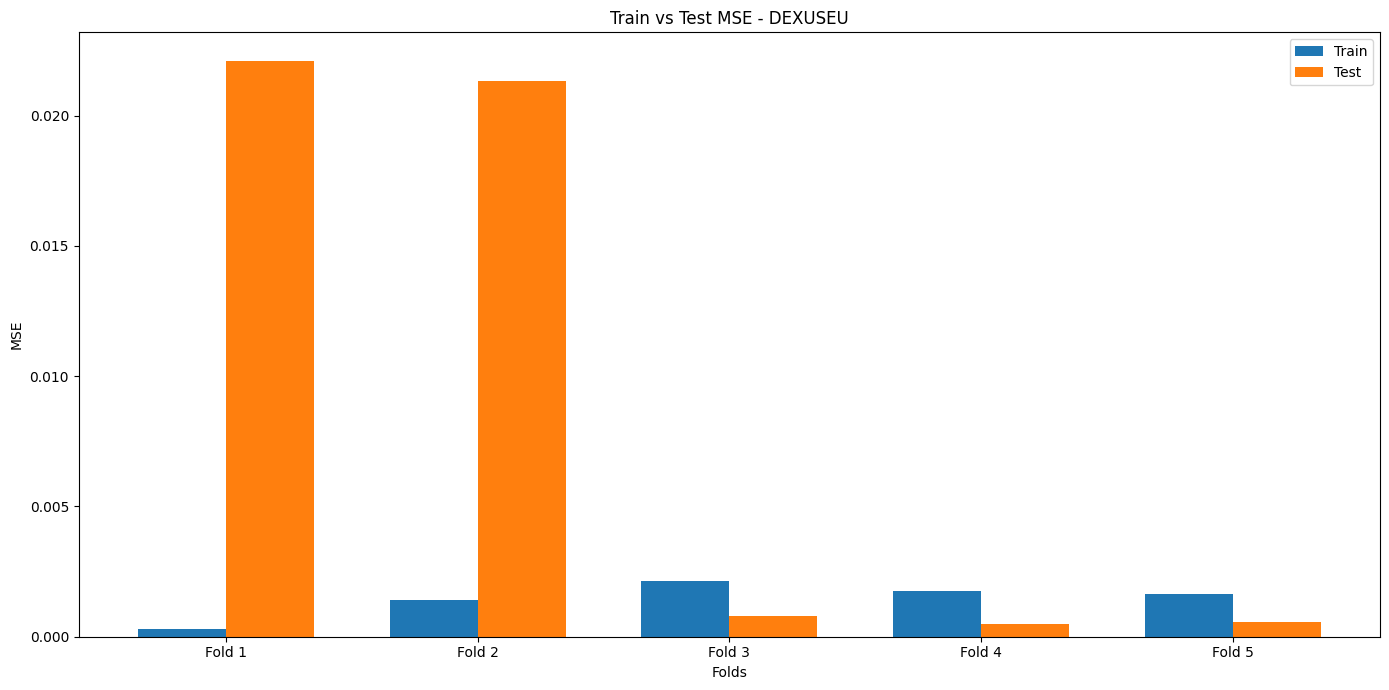

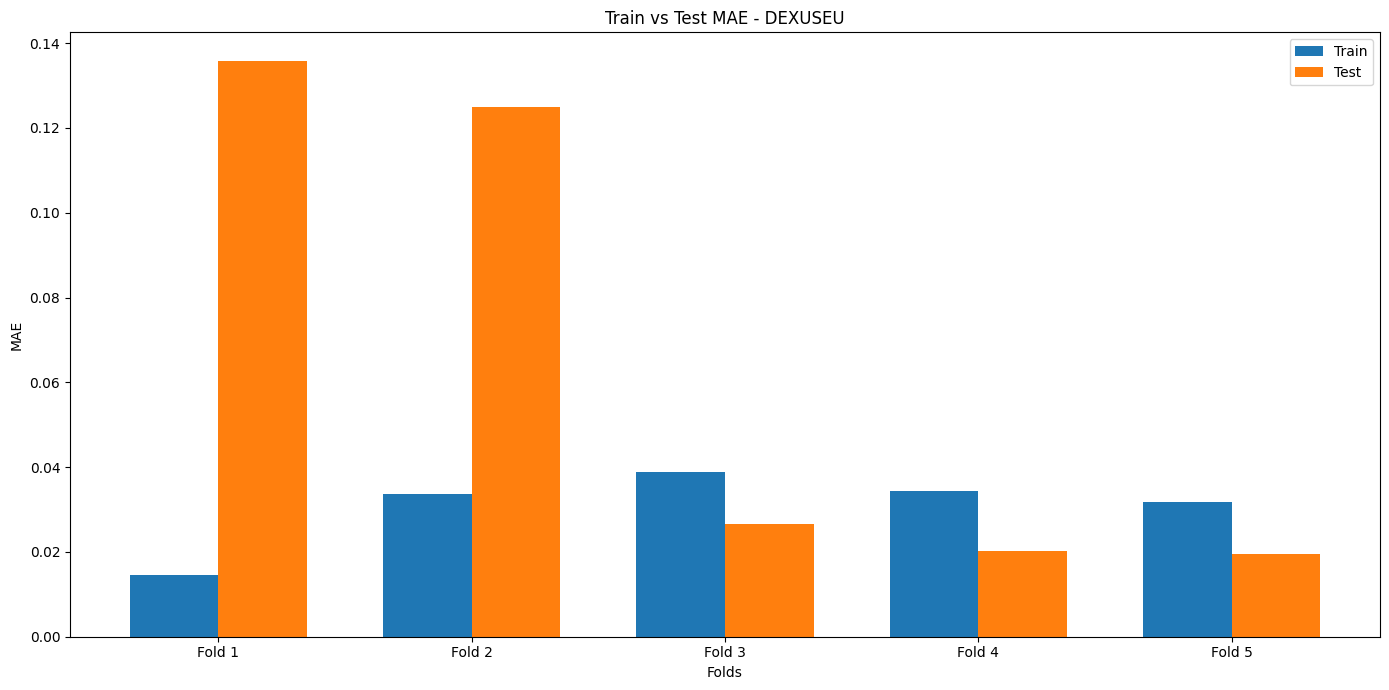

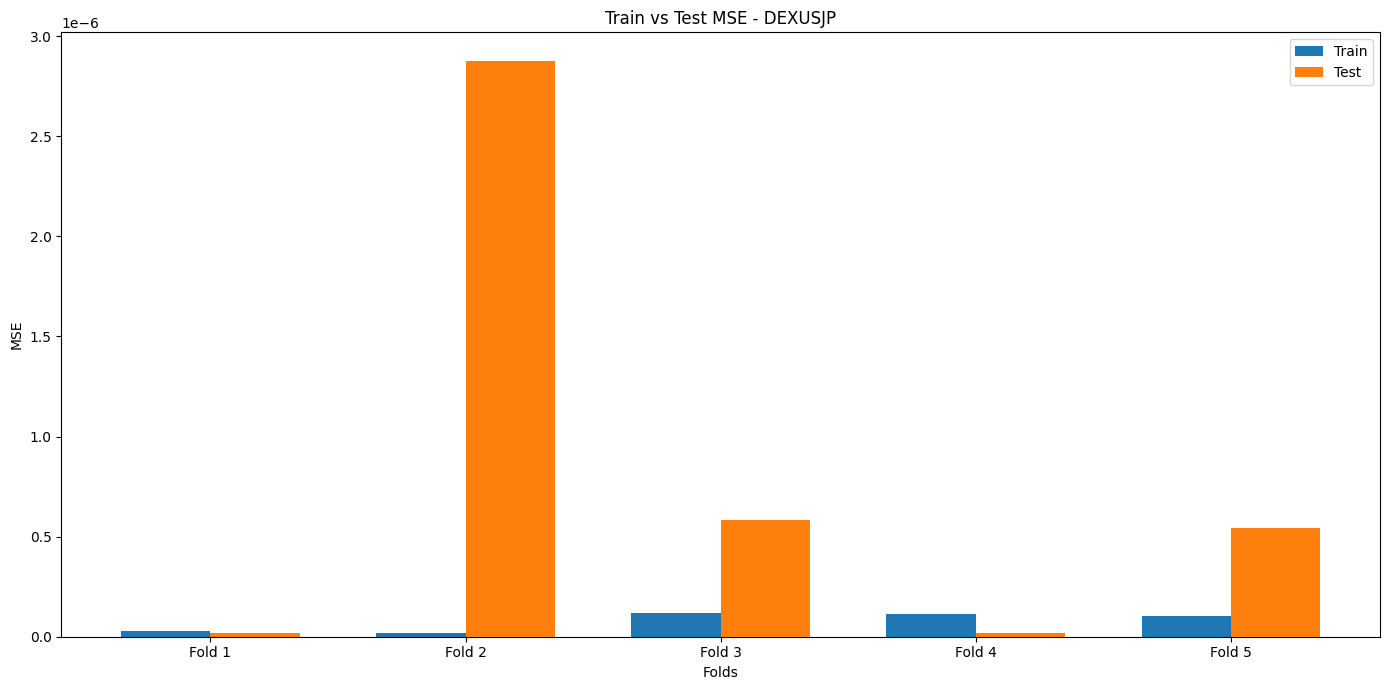

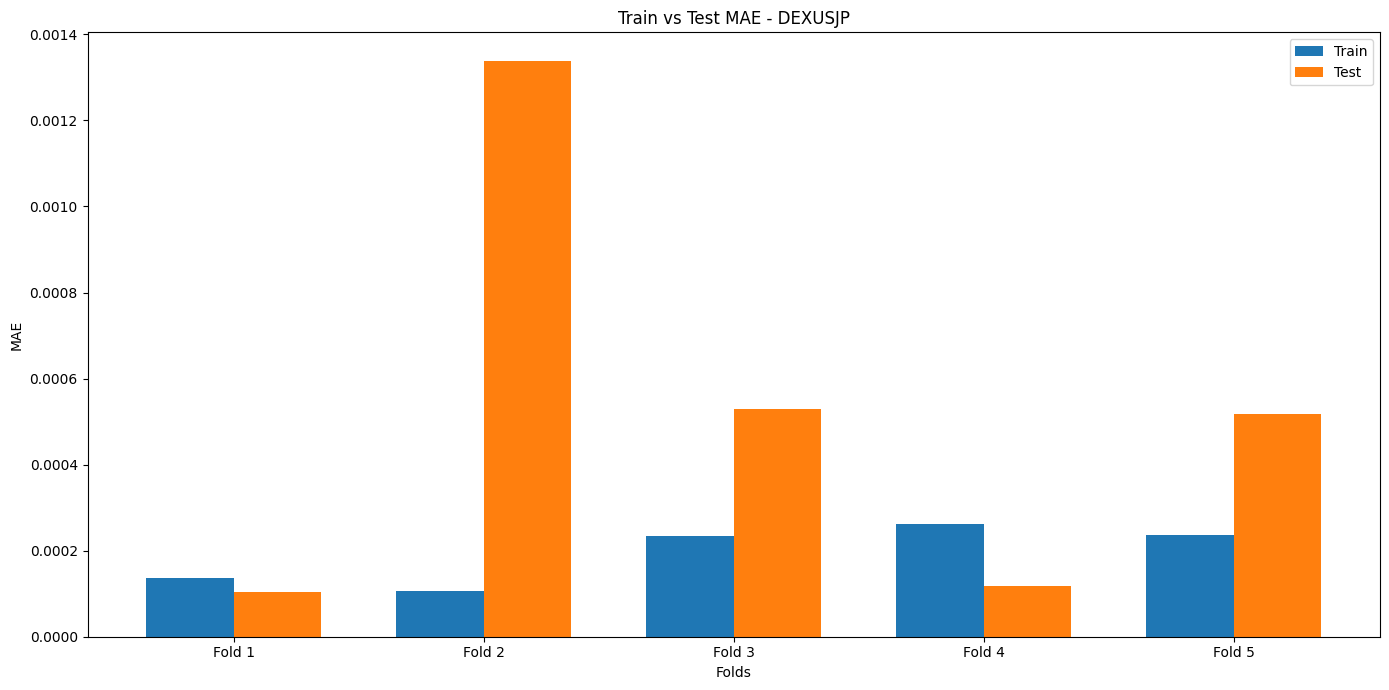

In [11]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values for each target column
def plot_actual_vs_predicted(results_df, target_column):
    for index, row in results_df[results_df['Target'] == target_column].iterrows():
        dates = data.iloc[row['Test Indexes']].index
        actual = row['Actual Test Values']
        predicted = row['Predicted Test Values']
        
        plt.figure(figsize=(14, 7))
        plt.plot(dates, actual, label='Actual')
        plt.plot(dates, predicted, label='Predicted', linestyle='dashed')
        plt.title(f'Actual vs Predicted - {target_column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Function to plot errors (MSE and MAE) for train and test sets
def plot_errors(results_df, metric, target_column):
    train_errors = results_df[results_df['Target'] == target_column][f'Train {metric}'].values
    test_errors = results_df[results_df['Target'] == target_column][f'Test {metric}'].values
    labels = [f'Fold {i+1}' for i in range(len(train_errors))]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 7))
    rects1 = ax.bar(x - width/2, train_errors, width, label='Train')
    rects2 = ax.bar(x + width/2, test_errors, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Folds')
    ax.set_ylabel(metric)
    ax.set_title(f'Train vs Test {metric} - {target_column}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

# Plot actual vs predicted for each target column
for target_column in target_columns:
    plot_actual_vs_predicted(results_df, target_column)

# Plot errors for each target column
metrics = ['MSE', 'MAE']
for target_column in target_columns:
    for metric in metrics:
        plot_errors(results_df, metric, target_column)


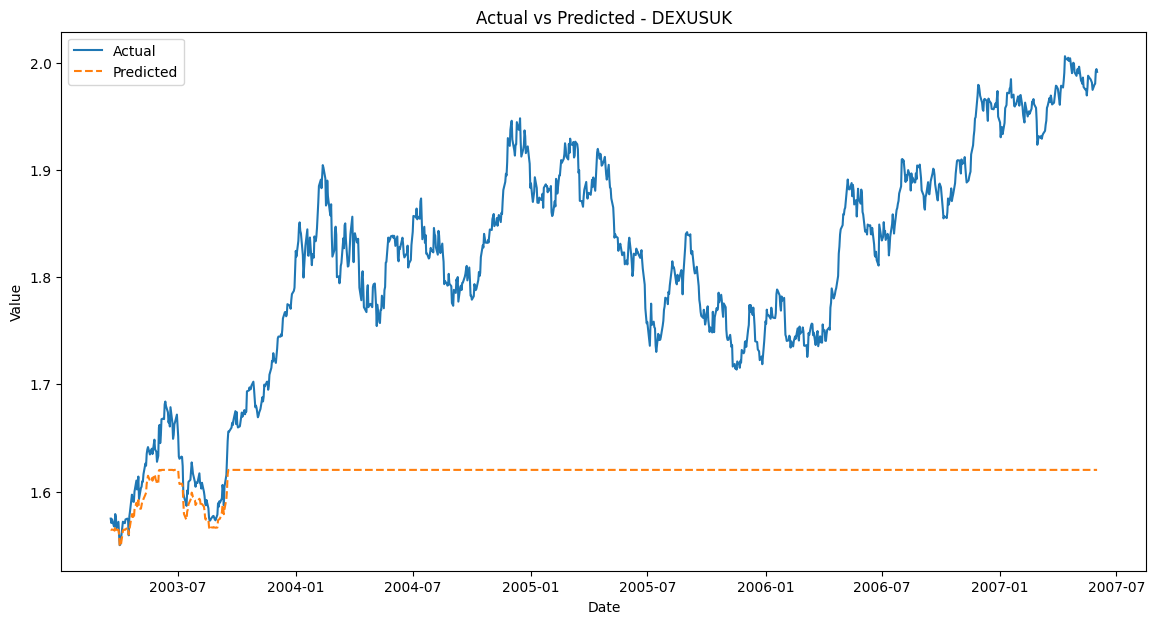

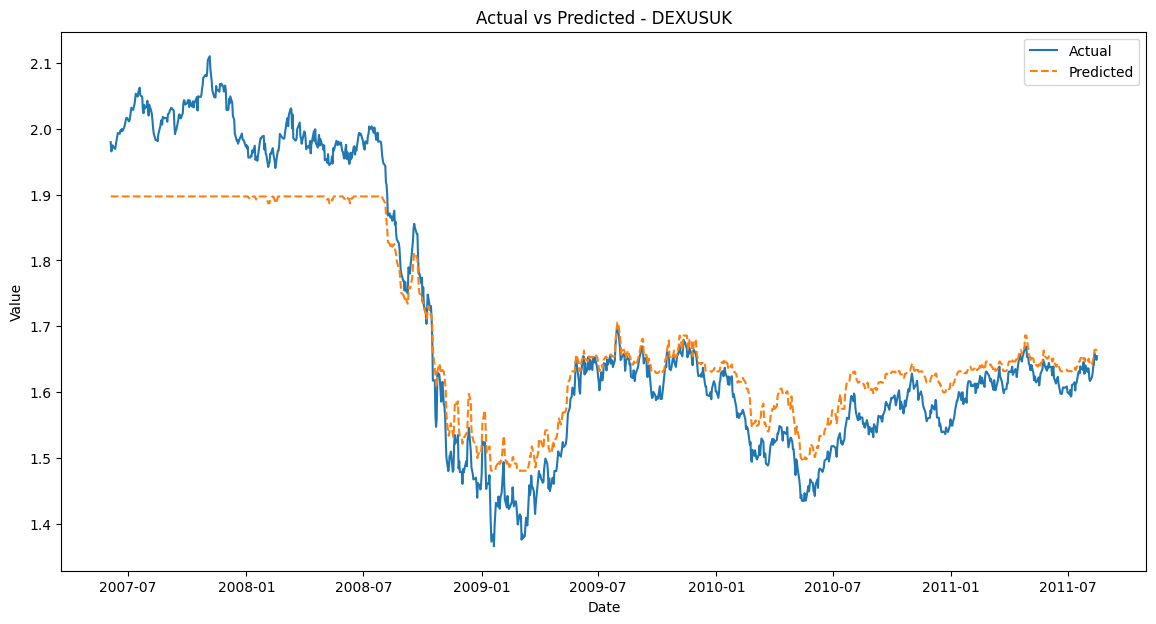

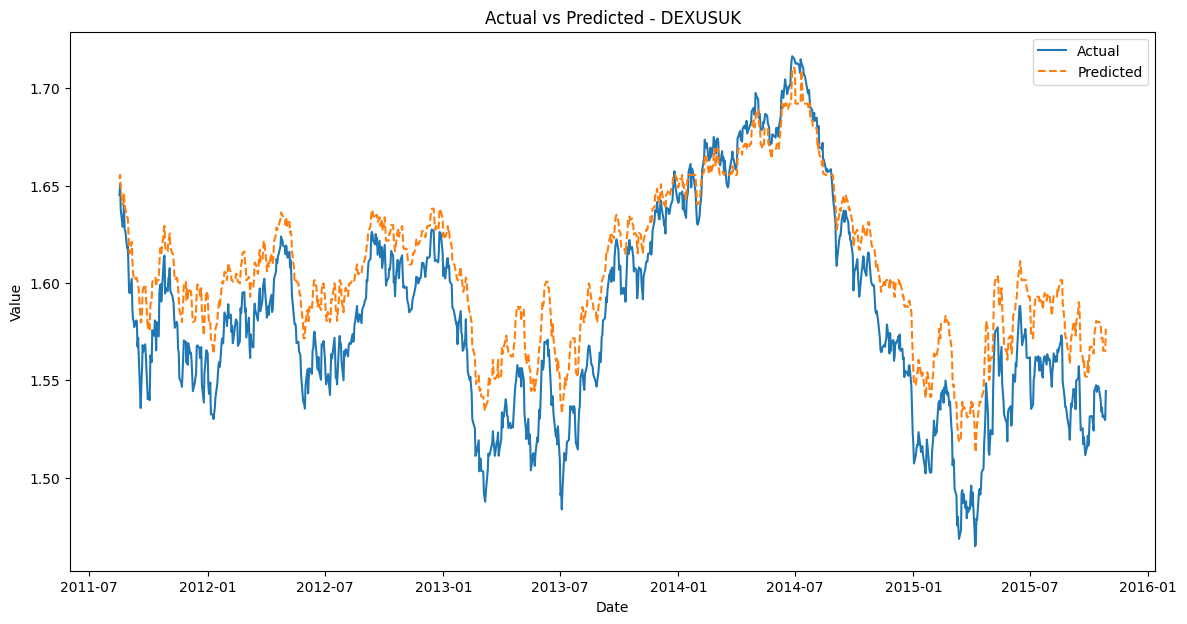

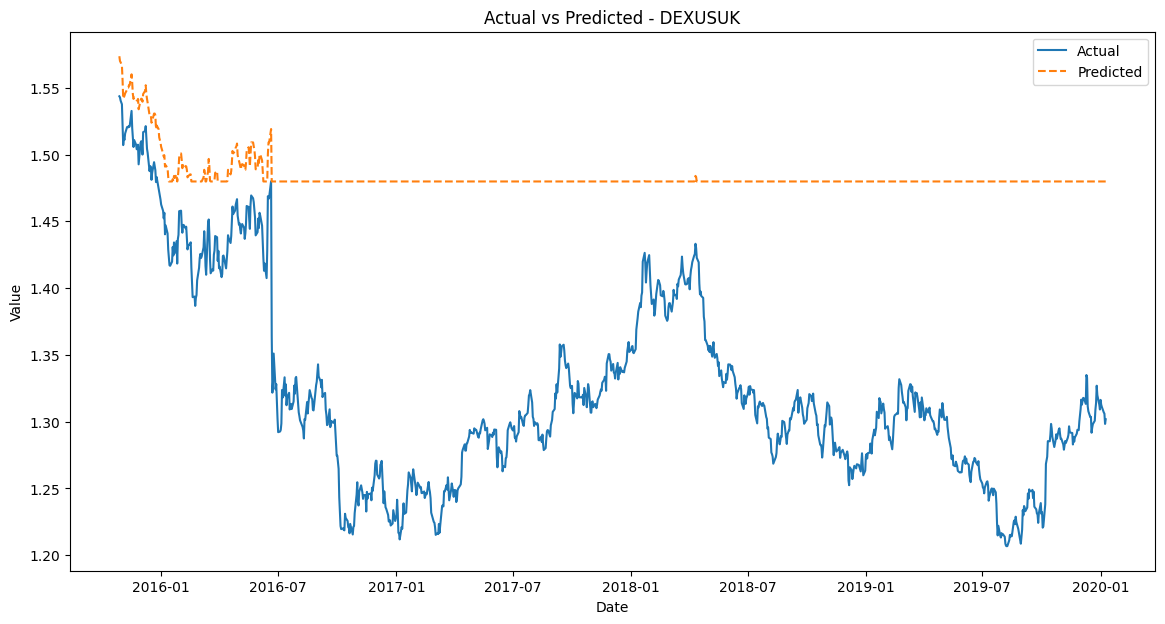

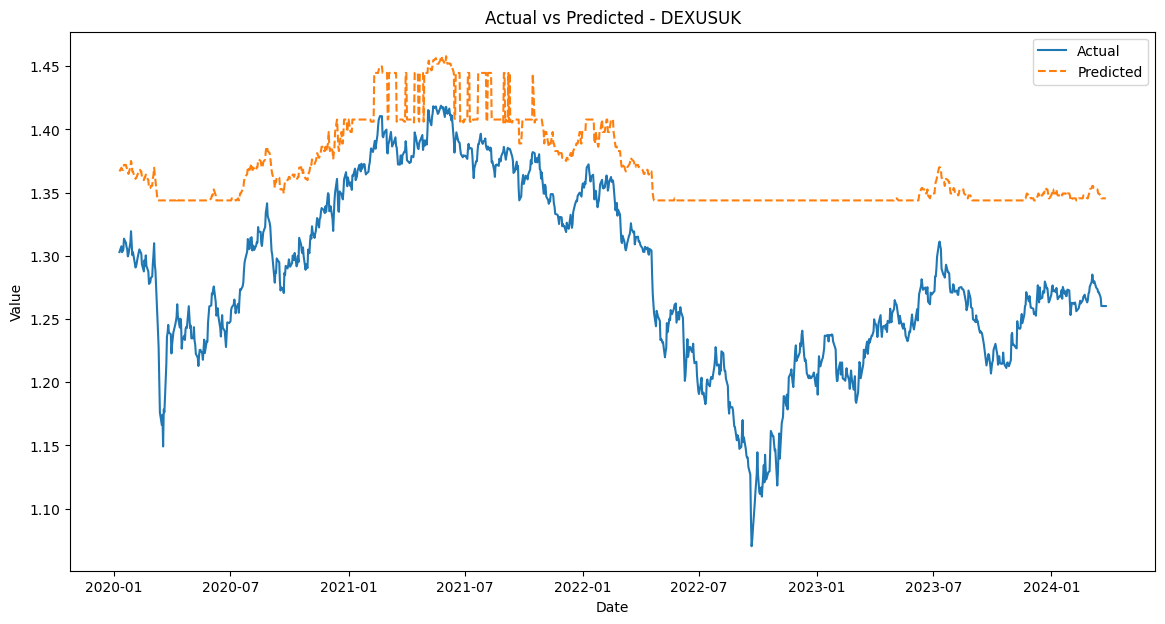

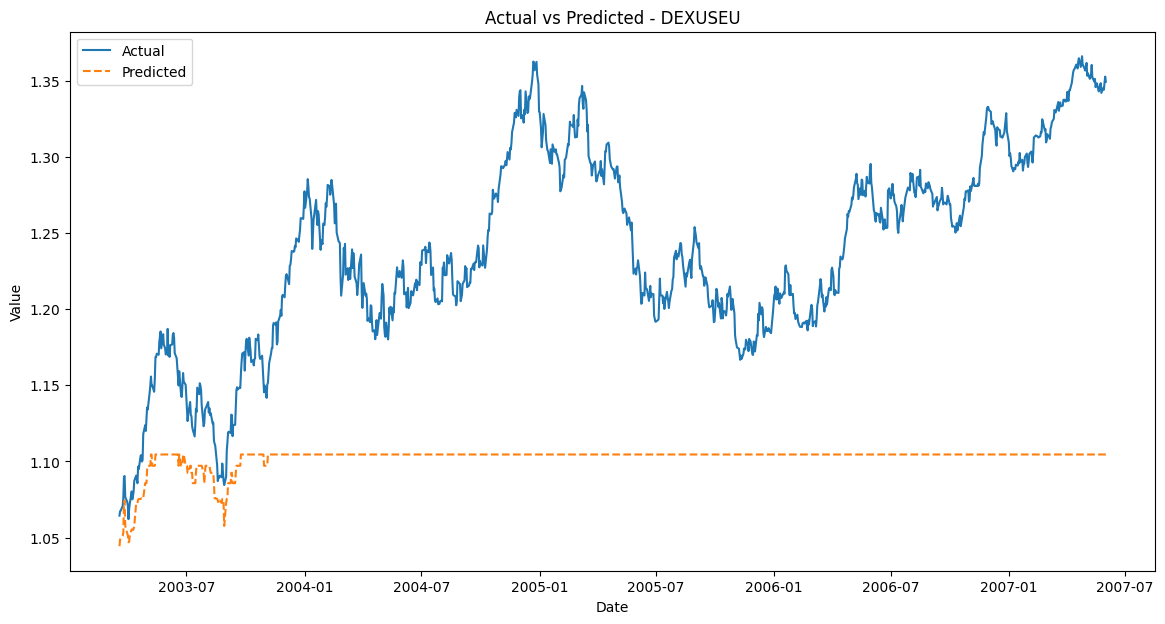

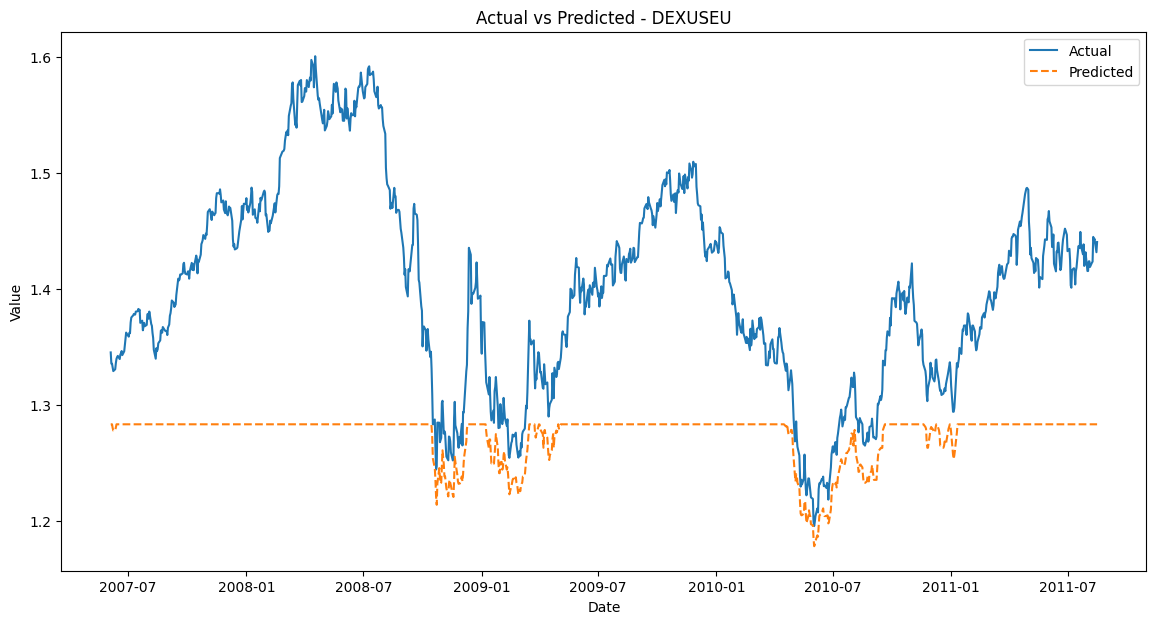

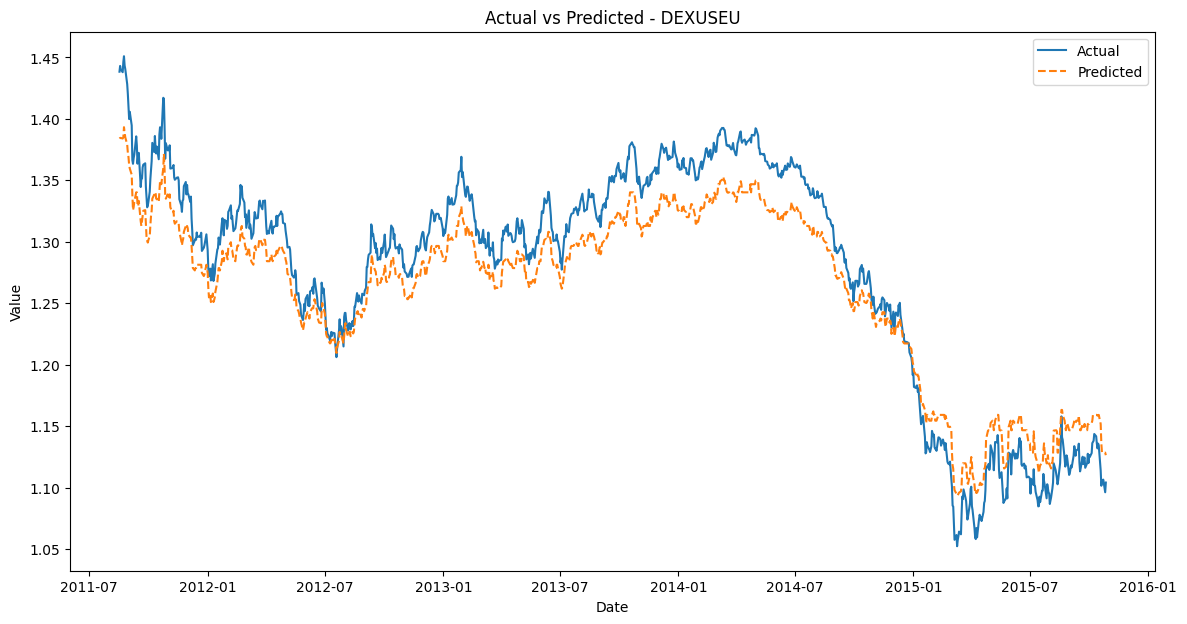

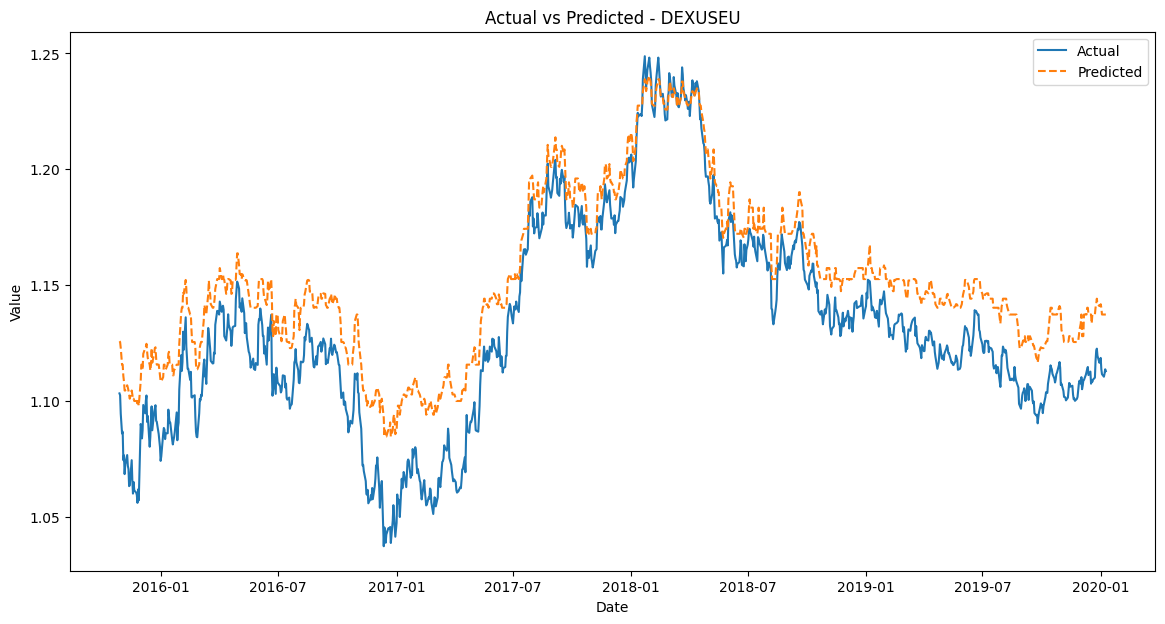

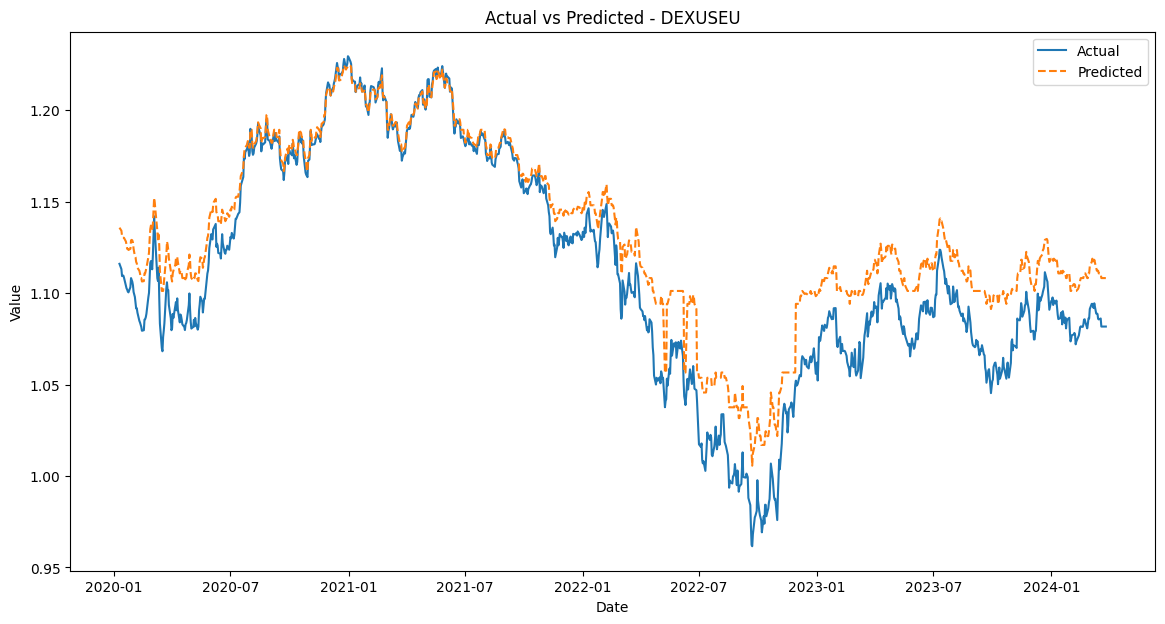

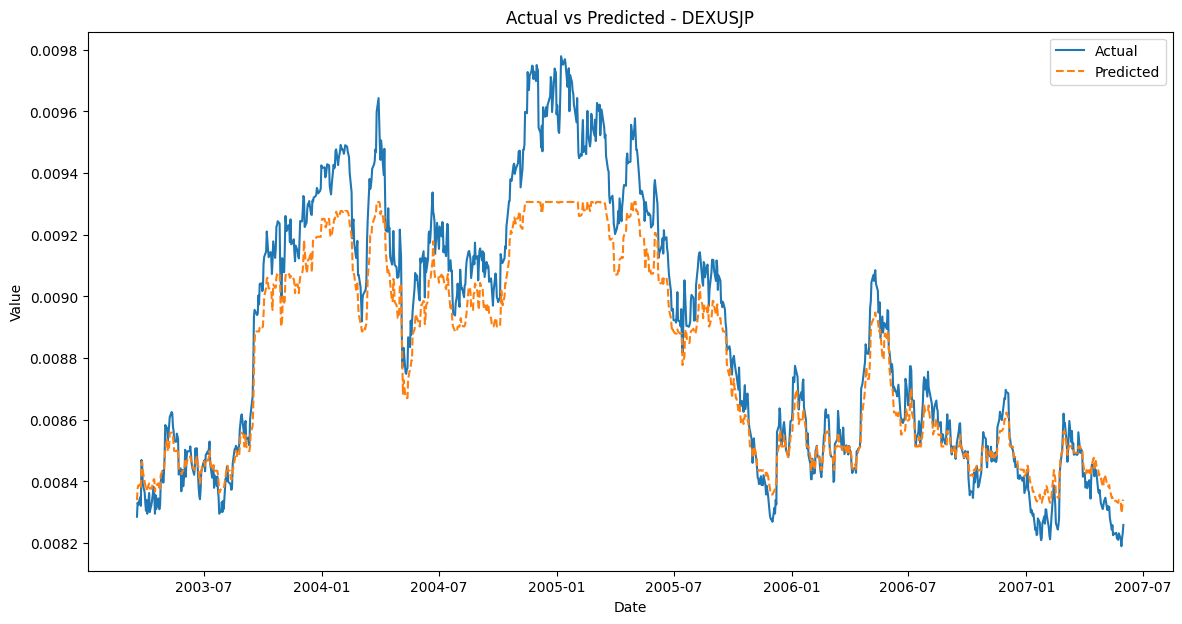

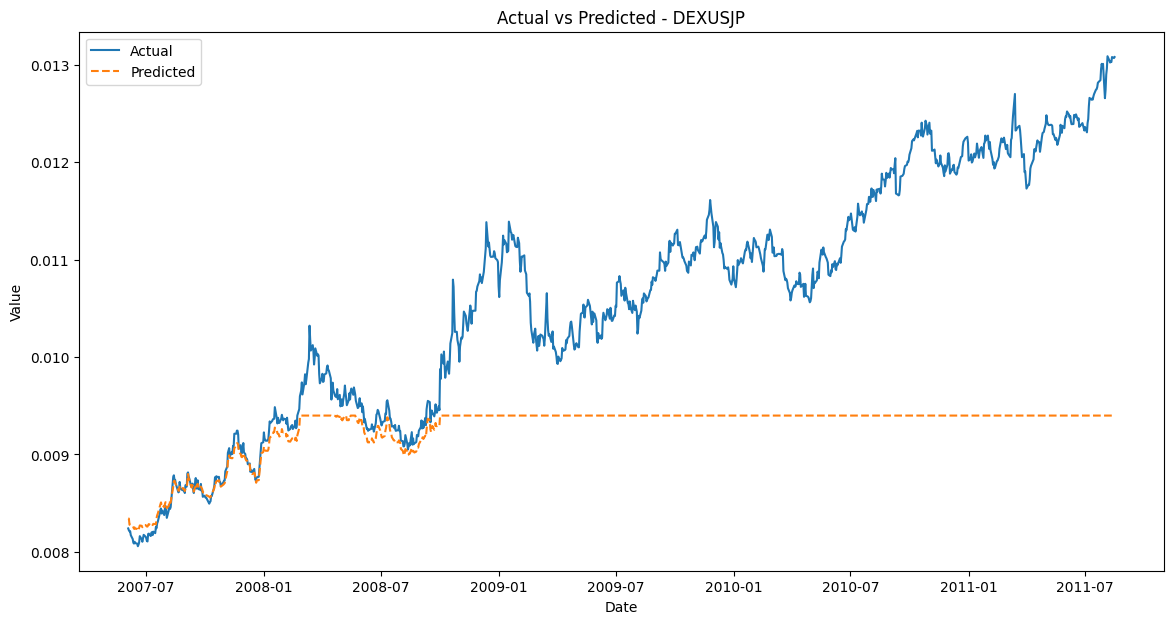

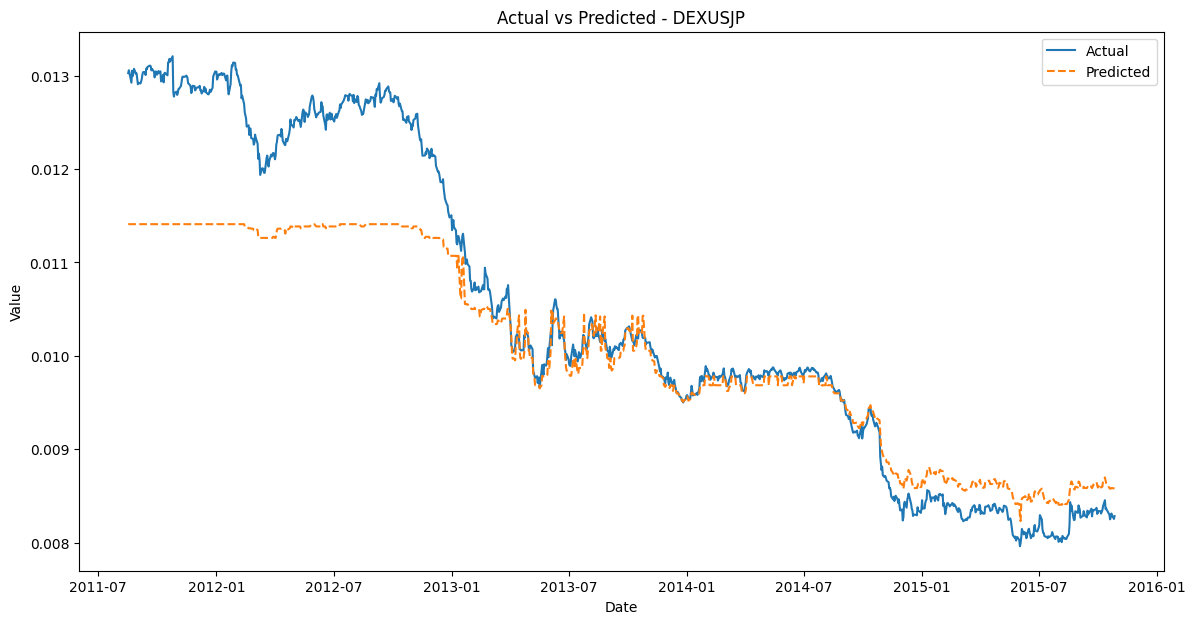

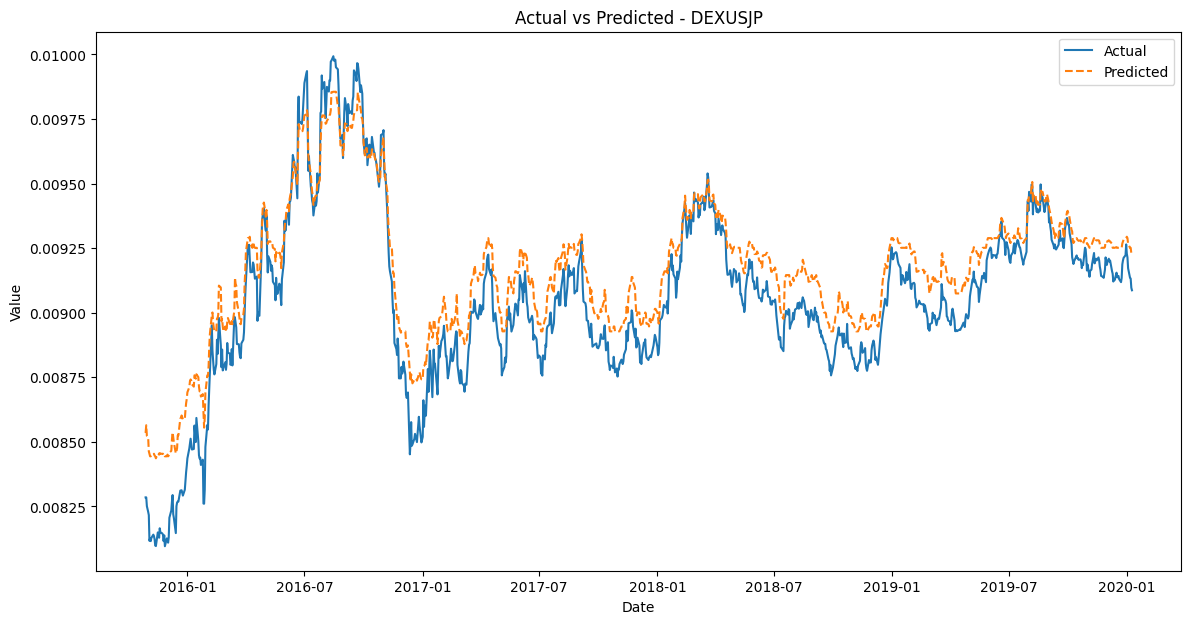

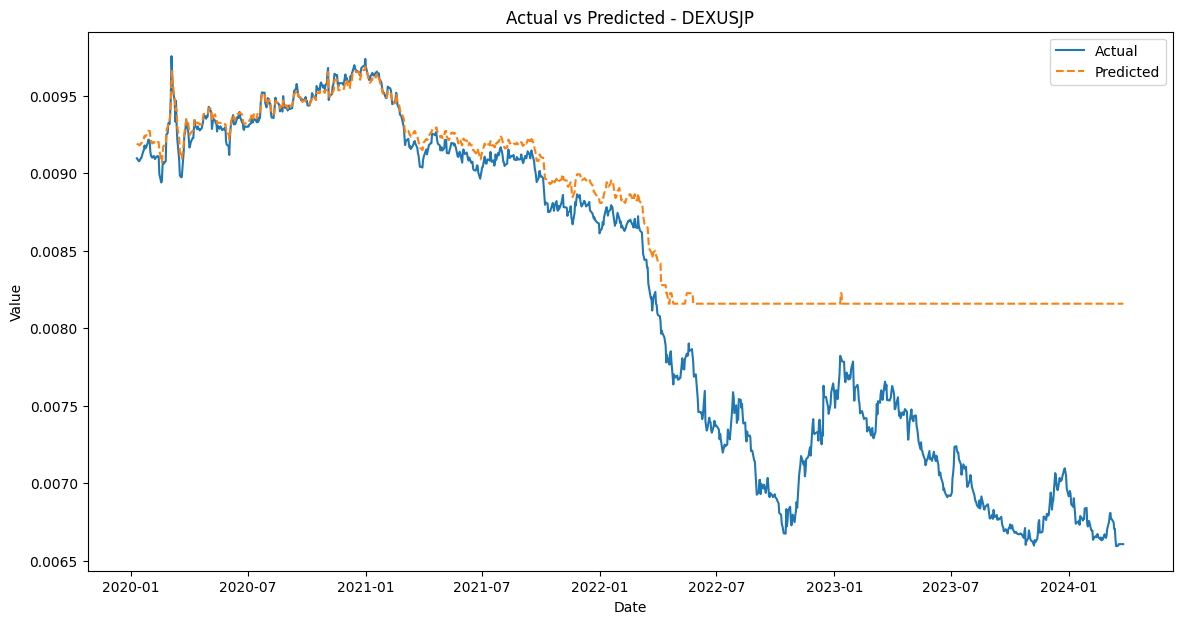

In [12]:
for target_column in target_columns:
    plot_actual_vs_predicted(results_df, target_column)


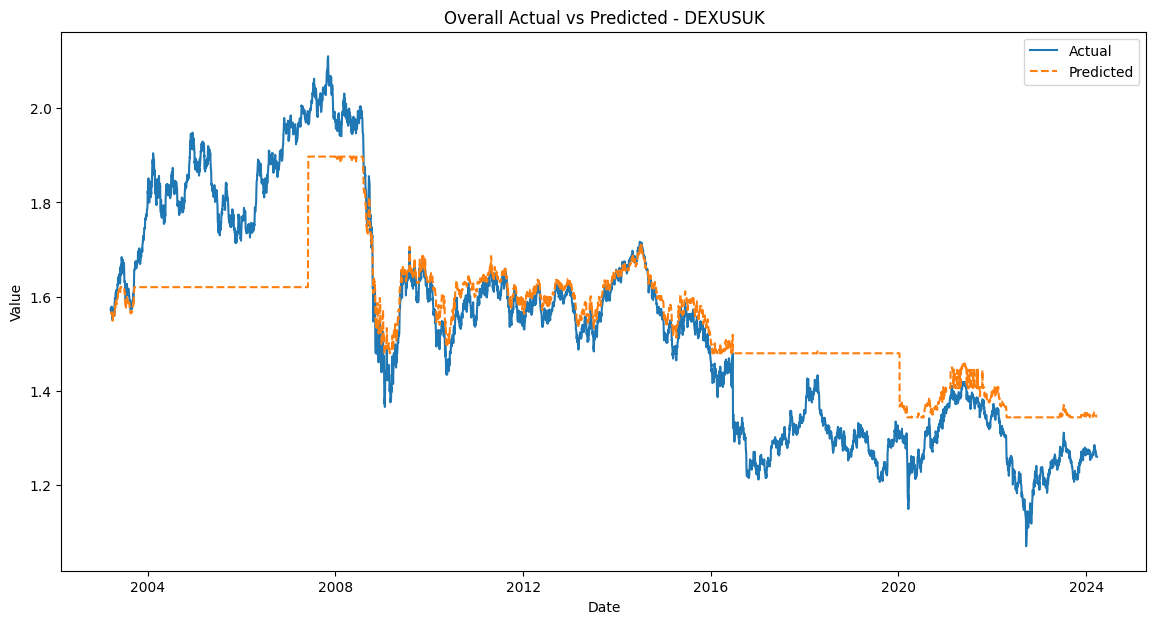

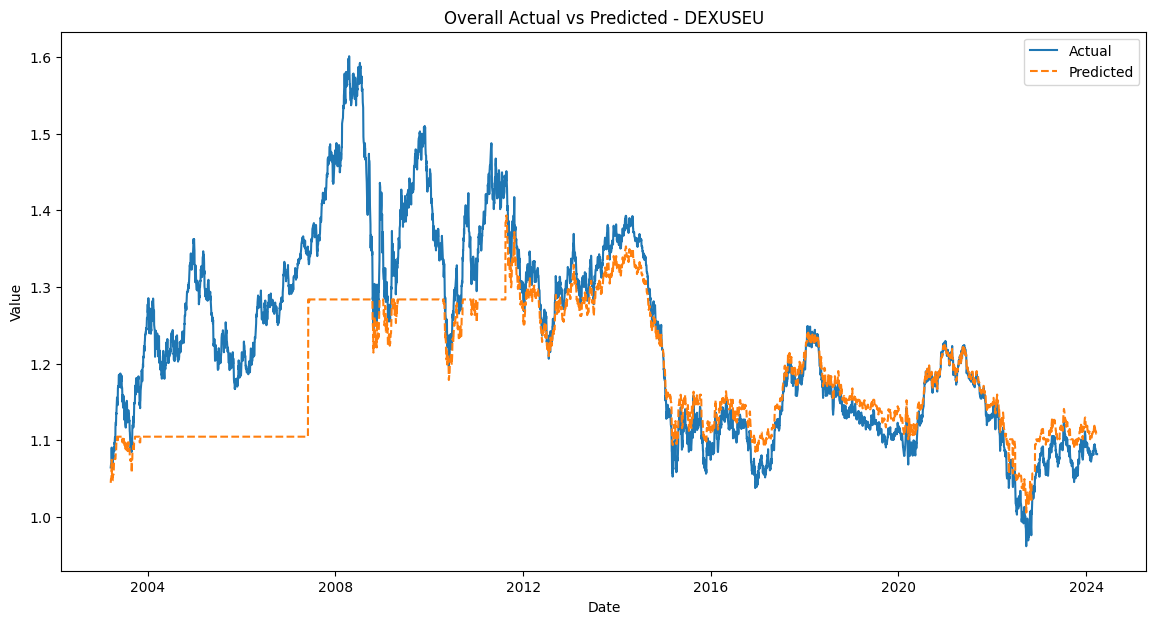

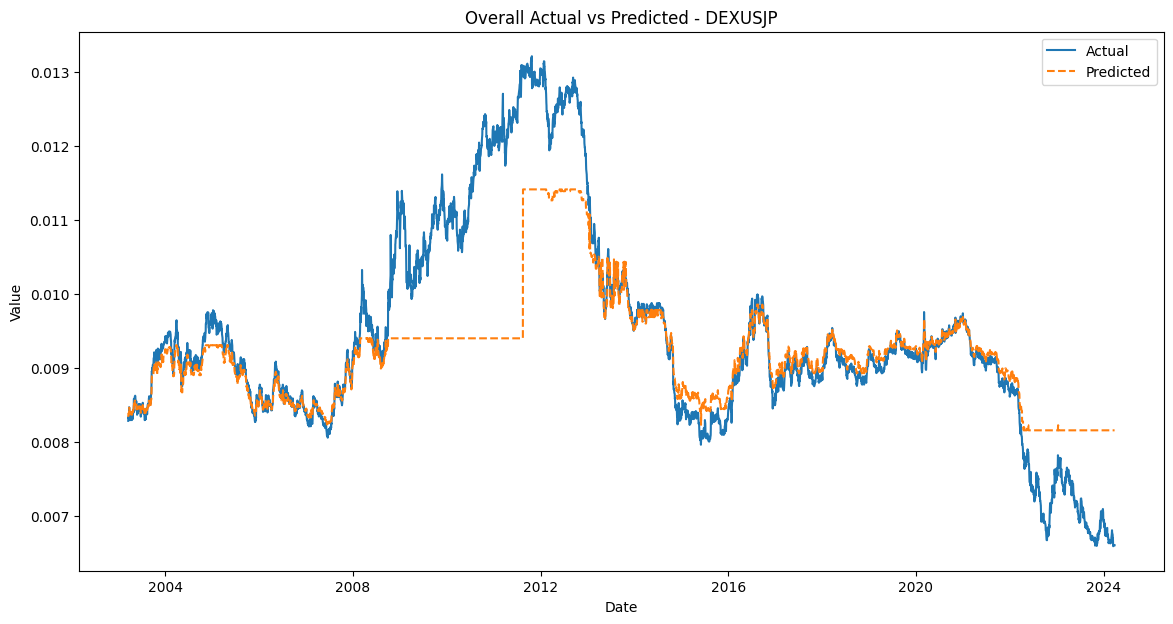

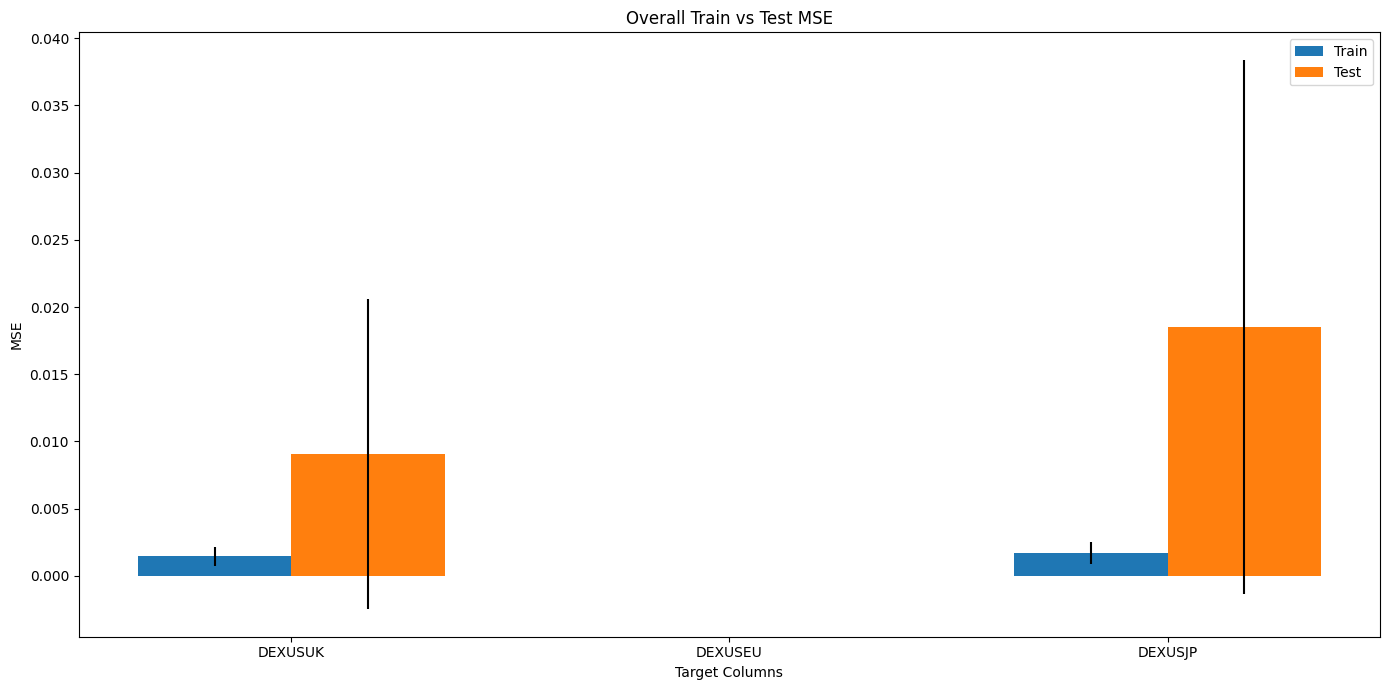

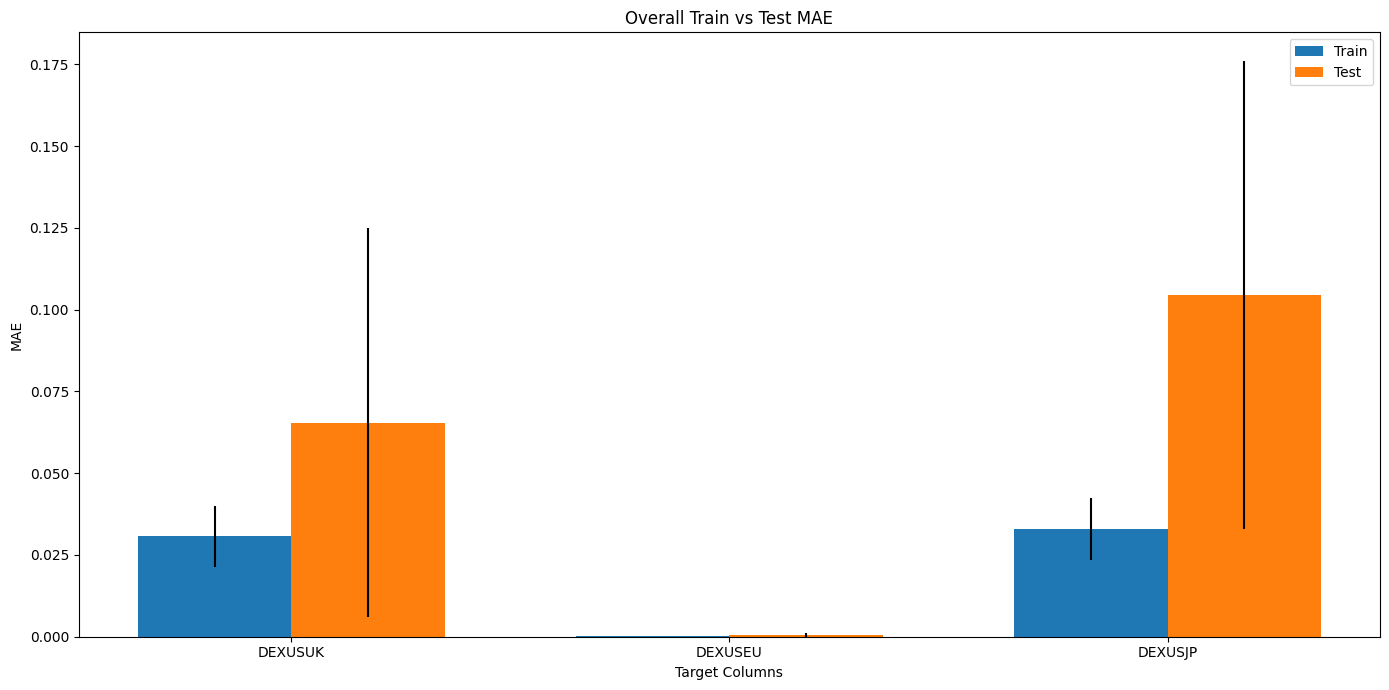

In [13]:
import matplotlib.pyplot as plt

# Function to plot overall actual vs predicted values for each target column
def plot_overall_actual_vs_predicted(results_df):
    for target_column in target_columns:
        plt.figure(figsize=(14, 7))
        all_dates = []
        all_actual = []
        all_predicted = []
        
        for index, row in results_df[results_df['Target'] == target_column].iterrows():
            dates = data.iloc[row['Test Indexes']].index
            actual = row['Actual Test Values']
            predicted = row['Predicted Test Values']
            
            all_dates.extend(dates)
            all_actual.extend(actual)
            all_predicted.extend(predicted)
        
        plt.plot(all_dates, all_actual, label='Actual')
        plt.plot(all_dates, all_predicted, label='Predicted', linestyle='dashed')
        plt.title(f'Overall Actual vs Predicted - {target_column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Function to plot overall errors (MSE and MAE) for train and test sets
def plot_overall_errors(results_df):
    metrics = ['MSE', 'MAE']
    
    for metric in metrics:
        fig, ax = plt.subplots(figsize=(14, 7))
        
        train_means = results_df.groupby('Target')[f'Train {metric}'].mean().values
        test_means = results_df.groupby('Target')[f'Test {metric}'].mean().values
        train_stds = results_df.groupby('Target')[f'Train {metric}'].std().values
        test_stds = results_df.groupby('Target')[f'Test {metric}'].std().values
        
        labels = target_columns
        
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        rects1 = ax.bar(x - width/2, train_means, width, yerr=train_stds, label='Train')
        rects2 = ax.bar(x + width/2, test_means, width, yerr=test_stds, label='Test')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_xlabel('Target Columns')
        ax.set_ylabel(metric)
        ax.set_title(f'Overall Train vs Test {metric}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        fig.tight_layout()
        plt.show()

# Plot overall actual vs predicted values for each target column
plot_overall_actual_vs_predicted(results_df)

# Plot overall errors for each target column
plot_overall_errors(results_df)
